# TIME SERIES ANALYSIS

# Step 1. LOAD DATA/ FILTER .

#### 1.1 Import necessary libraries

In [1]:
#Data Manipulation and Analysis
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations

#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# logistic regression
from sklearn.linear_model import LogisticRegression
#Time Series Analysis and Forecasting
import pmdarima as pm # For automatic ARIMA model selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing # For Holt-Winters Exponential Smoothing
from statsmodels.tsa.arima_model import ARIMA # For Autoregressive Integrated Moving Average (ARIMA) modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX # For Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX)
from statsmodels.tsa.seasonal import seasonal_decompose # For decomposition of time series data
from statsmodels.graphics.tsaplots import plot_acf # For plotting autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_pacf # For plotting partial autocorrelation function (PACF)
from sklearn.model_selection import TimeSeriesSplit # For cross-validation on time series data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
#Data Visualization
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For statistical data visualization


#Other
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")# Filter warnings
import matplotlib.dates as mdates # For formatting dates in plots
from sklearn.metrics import mean_squared_error # For calculating mean squared error
import statsmodels.api as sm # For time series analysis
from statsmodels.tsa.stattools import adfuller # For Augmented Dickey-Fuller test
from math import sqrt # For mathematical functions

#### 1.2 Load and read datasets

#### 1.2.1 Causes of death in children under5
we load our first dataset and call it risk_data then proceed to clean and handle missing values.

In [2]:
# Loading deaths risks dataset

risk_data = pd.read_csv('causes_death_children_under5.csv')

risk_data.head()

Entity Code  Year  \
0           Afghanistan  AFG  1990   
1  African Region (WHO)    0  1990   
2               Albania  ALB  1990   
3               Algeria  DZA  1990   
4        American Samoa  ASM  1990   

   Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)  \
0                                                 48                                       
1                                              26869                                       
2                                                  0                                       
3                                                 16                                       
4                                                  0                                       

   Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)  \
0                                                105                     
1                                               4381                     
2                                                  5                     
3                                                 17                     
4                                                  0                     

   Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)  \
0                                               1779                       
1                                             170136                       
2                                                 33                       
3                                                316                       
4                                                  1                       

   Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)  \
0                                                718              
1                                               3388              
2                                                  3              
3                                                 92              
4                                                  0              

   Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)  \
0                                                431        
1                                              17987        
2                                                 44        
3                                                182        
4                                                  0        

   Deaths - Measles - Sex: Both - Age: Under 5 (Number)  \
0                                               8649      
1                                             311413      
2                                                176      
3                                               2599      
4                                                  2      

   Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)  ...  \
0                                                477                ...   
1                                              17025                ...   
2                                                136                ...   
3                                                239                ...   
4                                                  0                ...   

   Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)  \
0                                               7112                       
1                                             100379                       
2                                                310                       
3                                               3326                       
4                                                  2                       

   Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)  \
0                                               2455             
1                                              71931             
2                                                 25             
3                                   

In [3]:
# Define a mapping of old column names to new simplified column names
column_mapping = {
    'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)': 'Invasive Non-typhoidal Salmonella (iNTS)',
    'Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)': 'Interpersonal violence',
    'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)': 'Nutritional deficiencies',
    'Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)': 'Acute hepatitis',
    'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)': 'Neoplasms',
    'Deaths - Measles - Sex: Both - Age: Under 5 (Number)': 'Measles',
    'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)': 'Digestive diseases',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)': 'Cirrhosis and other chronic liver diseases',
    'Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number)': 'Chronic kidney disease',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)': 'Cardiovascular diseases',
    'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)': 'Congenital birth defects',
    'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)': 'Lower respiratory infections',
    'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)': 'Neonatal preterm birth',
    'Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number)': 'Environmental heat and cold exposure',
    'Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)': 'Neonatal sepsis and other neonatal infections',
    'Deaths - Exposure to forces of nature - Sex: Both - Age: Under 5 (Number)': 'Exposure to forces of nature',
    'Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number)': 'Diabetes mellitus',
    'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)': 'Neonatal encephalopathy due to birth asphyxia and trauma',
    'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)': 'Meningitis',
    'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)': 'Other neonatal disorders',
    'Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)': 'Whooping cough',
    'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)': 'Diarrheal diseases',
    'Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)': 'Fire, heat, and hot substances',
    'Deaths - Road injuries - Sex: Both - Age: Under 5 (Number)': 'Road injuries',
    'Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number)': 'Tuberculosis',
    'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)': 'HIV/AIDS',
    'Deaths - Drowning - Sex: Both - Age: Under 5 (Number)': 'Drowning',
    'Deaths - Malaria - Sex: Both - Age: Under 5 (Number)': 'Malaria',
    'Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)': 'Syphilis'
}

# Rename columns using the defined mapping
risk_data.rename(columns=column_mapping, inplace=True)

# Display the DataFrame with simplified column names
risk_data.head()



Entity Code  Year  Invasive Non-typhoidal Salmonella (iNTS)  \
0           Afghanistan  AFG  1990                                        48   
1  African Region (WHO)    0  1990                                     26869   
2               Albania  ALB  1990                                         0   
3               Algeria  DZA  1990                                        16   
4        American Samoa  ASM  1990                                         0   

   Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
0                     105                      1779              718   
1                    4381                    170136             3388   
2                       5                        33                3   
3                      17                       316               92   
4                       0                         1                0   

   Neoplasms  Measles  Digestive diseases  ...  Other neonatal disorders  \
0        431     8649                 477  ...                      7112   
1      17987   311413               17025  ...                    100379   
2         44      176                 136  ...                       310   
3        182     2599                 239  ...                      3326   
4          0        2                   0  ...                         2   

   Whooping cough  Diarrheal diseases  Fire, heat, and hot substances  \
0            2455                3968                             131   
1           71931              686390                            9165   
2              25                  68                              11   
3             628                2666                             217   
4               1                   1                               0   

   Road injuries  Tuberculosis  HIV/AIDS  Drowning  Malaria  Syphilis  
0            802           808        10       776       21       123  
1          28173         78180     67976     16651   447410     54547  
2             27             4         0        34        0        10  
3           1446            94        15       310        0       163  
4              0             0         0         0        0         3  

[5 rows x 32 columns]

In [4]:
risk_data.tail()

Entity Code  Year  \
6835  World Bank Lower Middle Income    0  2019   
6836  World Bank Upper Middle Income    0  2019   
6837                           Yemen  YEM  2019   
6838                          Zambia  ZMB  2019   
6839                        Zimbabwe  ZWE  2019   

      Invasive Non-typhoidal Salmonella (iNTS)  Interpersonal violence  \
6835                                     31512                    5188   
6836                                       324                    2458   
6837                                        56                      35   
6838                                        45                      71   
6839                                       108                      31   

      Nutritional deficiencies  Acute hepatitis  Neoplasms  Measles  \
6835                     34881            10748      19536    22646   
6836                      4868              273       9475     1593   
6837                       542               53        248      366   
6838                       986               14        399      137   
6839                      1598               15         57      349   

      Digestive diseases  ...  Other neonatal disorders  Whooping cough  \
6835               19148  ...                    256369           60535   
6836                4364  ...                     29160            3880   
6837                 267  ...                      6492             901   
6838                 243  ...                      1984             455   
6839                  89  ...                      2190             536   

      Diarrheal diseases  Fire, heat, and hot substances  Road injuries  \
6835              302100                            6986          16890   
6836               11628                            1587           8193   
6837                5950                             144           1124   
6838                3754                              92            147   
6839                1067                             112            112   

      Tuberculosis  HIV/AIDS  Drowning  Malaria  Syphilis  
6835         24981     20756     19866   155443     38587  
6836          1435      5222      7453      779      5750  
6837            65        86       218       64       395  
6838           251      3022       130     2496      1329  
6839           661      1394       127     1207       413  

[5 rows x 32 columns]

In [5]:
# Look into a specific column Entity as we can see above we have non_countries such as world bank represented
#how many other non_countries are there?
column_name = risk_data['Entity']  

# Display the unique values or any other analysis of the specific column
print(column_name.unique()) 

['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific (WB)'
 'East Timor' 'Eastern Mediterranean Region (WHO)' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe & Central Asia (WB)'
 'European Region (WHO)' 'Fiji' 'Finland' 'France' 'G20' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Green

In [6]:
#do away with the non_country entries because the do not focus on specific countries hence making them
#irrelevant to the analysis.

non_countries = [
    'African Region (WHO)', 'American Samoa', 'East Asia & Pacific (WB)',
    'Eastern Mediterranean Region (WHO)', 'England', 'Europe & Central Asia (WB)',
    'European Region (WHO)', 'G20', 'Latin America & Caribbean (WB)',
    'Micronesia (country)', 'Middle East & North Africa (WB)', 'North America (WB)',
    'North Korea', 'Northern Ireland', 'Northern Mariana Islands', 'OECD Countries',
    'Palestine', 'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
    'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Taiwan',
    'Western Pacific Region (WHO)', 'World', 'World Bank High Income',
    'World Bank Low Income', 'World Bank Lower Middle Income',
    'World Bank Upper Middle Income', 'Wales'
]

# Filtering out non-country entities
risk_data = risk_data[~risk_data['Entity'].isin(non_countries)]



In [7]:
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5940 entries, 0 to 6839
Data columns (total 32 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Entity                                                    5940 non-null   object
 1   Code                                                      5940 non-null   object
 2   Year                                                      5940 non-null   int64 
 3   Invasive Non-typhoidal Salmonella (iNTS)                  5940 non-null   int64 
 4   Interpersonal violence                                    5940 non-null   int64 
 5   Nutritional deficiencies                                  5940 non-null   int64 
 6   Acute hepatitis                                           5940 non-null   int64 
 7   Neoplasms                                                 5940 non-null   int64 
 8   Measles                     

#### 1.2.2. Load second data 

In [8]:
# Loading deaths risks dataset

child_data = pd.read_csv('per-capita-total-expenditure-on-health-vs-child-mortality.csv')

child_data.head()

Entity      Code  Year  \
0     Abkhazia  OWID_ABK  2015   
1  Afghanistan       AFG  1960   
2  Afghanistan       AFG  1961   
3  Afghanistan       AFG  1962   
4  Afghanistan       AFG  1963   

   Mortality rate, under-5 (per 1,000 live births)  \
0                                              NaN   
1                                        35.820001   
2                                        35.220001   
3                                        34.629999   
4                                        34.060001   

   Current health expenditure per capita, PPP (current international $)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

   Population (historical estimates) Continent  
0                                NaN      Asia  
1                          8996967.0       NaN  
2                          9169406.0       NaN  
3                          9351442.0       NaN  
4                          9543200.0       NaN

In [9]:
# Convert 'Year' column to numeric (in case it's not already)
child_data['Year'] = pd.to_numeric(child_data['Year'], errors='coerce')

# Filter the DataFrame to include only years between 1990 and 2020
child_data_filtered = child_data[(child_data['Year'] >= 1990) & (child_data['Year'] <= 2020)]

# Display the cleaned DataFrame
child_data_filtered.head()

Entity      Code  Year  \
0      Abkhazia  OWID_ABK  2015   
31  Afghanistan       AFG  1990   
32  Afghanistan       AFG  1991   
33  Afghanistan       AFG  1992   
34  Afghanistan       AFG  1993   

    Mortality rate, under-5 (per 1,000 live births)  \
0                                               NaN   
31                                        17.839999   
32                                        17.220000   
33                                        16.630000   
34                                        16.070000   

    Current health expenditure per capita, PPP (current international $)  \
0                                                 NaN                      
31                                                NaN                      
32                                                NaN                      
33                                                NaN                      
34                                                NaN                      

    Population (historical estimates) Continent  
0                                 NaN      Asia  
31                         12412311.0       NaN  
32                         13299016.0       NaN  
33                         14485543.0       NaN  
34                         15816601.0       NaN

In [10]:
# Drop unwanted columns 
child_data_filtered.drop(columns=['Current health expenditure per capita, PPP (current international $)', 'Population (historical estimates)', 'Continent'], inplace=True)

# Display the DataFrame after dropping columns
child_data_filtered.head()

Entity      Code  Year  \
0      Abkhazia  OWID_ABK  2015   
31  Afghanistan       AFG  1990   
32  Afghanistan       AFG  1991   
33  Afghanistan       AFG  1992   
34  Afghanistan       AFG  1993   

    Mortality rate, under-5 (per 1,000 live births)  
0                                               NaN  
31                                        17.839999  
32                                        17.220000  
33                                        16.630000  
34                                        16.070000

In [11]:
child_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7992 entries, 0 to 56107
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           7992 non-null   object 
 1   Code                                             7372 non-null   object 
 2   Year                                             7992 non-null   int64  
 3   Mortality rate, under-5 (per 1,000 live births)  6448 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 312.2+ KB


#### 1.2.3 Merge  data sets 1, 2

In [12]:
# Merge the two DataFrames on the 'Entity'/'Country Name', 'Code', and 'Year' columns
merged_df = pd.merge(risk_data, child_data_filtered, on=['Entity', 'Code', 'Year'])

# Display the merged DataFrame
merged_df.head()


Entity Code  Year  Invasive Non-typhoidal Salmonella (iNTS)  \
0  Afghanistan  AFG  1990                                        48   
1      Albania  ALB  1990                                         0   
2      Algeria  DZA  1990                                        16   
3      Andorra  AND  1990                                         0   
4       Angola  AGO  1990                                       255   

   Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
0                     105                      1779              718   
1                       5                        33                3   
2                      17                       316               92   
3                       0                         0                0   
4                      62                     10013              121   

   Neoplasms  Measles  Digestive diseases  ...  Whooping cough  \
0        431     8649                 477  ...            2455   
1         44      176                 136  ...              25   
2        182     2599                 239  ...             628   
3          0        0                   0  ...               0   
4        335     5331                 370  ...            2304   

   Diarrheal diseases  Fire, heat, and hot substances  Road injuries  \
0                3968                             131            802   
1                  68                              11             27   
2                2666                             217           1446   
3                   0                               0              0   
4               28811                             249           1859   

   Tuberculosis  HIV/AIDS  Drowning  Malaria  Syphilis  \
0           808        10       776       21       123   
1             4         0        34        0        10   
2            94        15       310        0       163   
3             0         0         0        0         0   
4          5420        64       815     4096      1363   

   Mortality rate, under-5 (per 1,000 live births)  
0                                        17.839999  
1                                         4.100000  
2                                         4.910000  
3                                         1.510000  
4                                        22.280000  

[5 rows x 33 columns]

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    5910 non-null   object 
 1   Code                                                      5910 non-null   object 
 2   Year                                                      5910 non-null   int64  
 3   Invasive Non-typhoidal Salmonella (iNTS)                  5910 non-null   int64  
 4   Interpersonal violence                                    5910 non-null   int64  
 5   Nutritional deficiencies                                  5910 non-null   int64  
 6   Acute hepatitis                                           5910 non-null   int64  
 7   Neoplasms                                                 5910 non-null   int64  
 8   Measles           

#### 1.2.4. load the third dataset

In [14]:
# Loading the dataset

sex_data = pd.read_csv('child-mortality-by-sex.csv', encoding='latin1')

sex_data.head()

Entity      Code  Year  \
0     Abkhazia  OWID_ABK  2015   
1  Afghanistan       AFG  1961   
2  Afghanistan       AFG  1962   
3  Afghanistan       AFG  1963   
4  Afghanistan       AFG  1964   

   Mortality rate, under-5, female (per 1,000 live births)  \
0                                                NaN         
1                                          34.370001         
2                                          33.810001         
3                                          33.250000         
4                                          32.729999         

   Mortality rate, under-5, male (per 1,000 live births)  \
0                                                NaN       
1                                          35.979999       
2                                          35.400000       
3                                          34.829999       
4                                          34.260001       

   Population (historical estimates) Continent  
0                                NaN      Asia  
1                          9169406.0       NaN  
2                          9351442.0       NaN  
3                          9543200.0       NaN  
4                          9744772.0       NaN

In [15]:
# Drop unwanted columns 
sex_data.drop(columns=['Population (historical estimates)', 'Continent'], inplace=True)

# Display the DataFrame after dropping columns
sex_data.head()

Entity      Code  Year  \
0     Abkhazia  OWID_ABK  2015   
1  Afghanistan       AFG  1961   
2  Afghanistan       AFG  1962   
3  Afghanistan       AFG  1963   
4  Afghanistan       AFG  1964   

   Mortality rate, under-5, female (per 1,000 live births)  \
0                                                NaN         
1                                          34.370001         
2                                          33.810001         
3                                          33.250000         
4                                          32.729999         

   Mortality rate, under-5, male (per 1,000 live births)  
0                                                NaN      
1                                          35.979999      
2                                          35.400000      
3                                          34.829999      
4                                          34.260001

#### 1.2.5. merge dataset 1, 2, 3 

In [16]:
# Merge the two DataFrames on the 'Entity'/'Country Name', 'Code', and 'Year' columns
merged_df2 = pd.merge(merged_df, sex_data, on=['Entity', 'Code', 'Year'])

# Display the merged DataFrame
merged_df2.head()



Entity Code  Year  Invasive Non-typhoidal Salmonella (iNTS)  \
0  Afghanistan  AFG  1990                                        48   
1      Albania  ALB  1990                                         0   
2      Algeria  DZA  1990                                        16   
3      Andorra  AND  1990                                         0   
4       Angola  AGO  1990                                       255   

   Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
0                     105                      1779              718   
1                       5                        33                3   
2                      17                       316               92   
3                       0                         0                0   
4                      62                     10013              121   

   Neoplasms  Measles  Digestive diseases  ...  \
0        431     8649                 477  ...   
1         44      176                 136  ...   
2        182     2599                 239  ...   
3          0        0                   0  ...   
4        335     5331                 370  ...   

   Fire, heat, and hot substances  Road injuries  Tuberculosis  HIV/AIDS  \
0                             131            802           808        10   
1                              11             27             4         0   
2                             217           1446            94        15   
3                               0              0             0         0   
4                             249           1859          5420        64   

   Drowning  Malaria  Syphilis  \
0       776       21       123   
1        34        0        10   
2       310        0       163   
3         0        0         0   
4       815     4096      1363   

   Mortality rate, under-5 (per 1,000 live births)  \
0                                        17.839999   
1                                         4.100000   
2                                         4.910000   
3                                         1.510000   
4                                        22.280000   

   Mortality rate, under-5, female (per 1,000 live births)  \
0                                          17.389999         
1                                           3.690000         
2                                           4.480000         
3                                           1.270000         
4                                          21.089999         

   Mortality rate, under-5, male (per 1,000 live births)  
0                                              18.25      
1                                               4.49      
2                                               5.32      
3                                               1.74      
4                                              23.40      

[5 rows x 35 columns]

In [17]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    5910 non-null   object 
 1   Code                                                      5910 non-null   object 
 2   Year                                                      5910 non-null   int64  
 3   Invasive Non-typhoidal Salmonella (iNTS)                  5910 non-null   int64  
 4   Interpersonal violence                                    5910 non-null   int64  
 5   Nutritional deficiencies                                  5910 non-null   int64  
 6   Acute hepatitis                                           5910 non-null   int64  
 7   Neoplasms                                                 5910 non-null   int64  
 8   Measles           

#### 1.2.6 load dataset 4

In [18]:
# Loading the dataset

age_data = pd.read_csv('child-deaths-by-age.csv', encoding='latin1')

age_data.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
0                                               9869           
1                                              10963           
2                                              12905           
3                                              14399           
4                                              15015           

   Deaths - All causes - Sex: Both - Age: 1-4 years (Number)  \
0                                              21812           
1                                              21565           
2                                              21929           
3                                              24292           
4                                              28068           

   Deaths - All causes - Sex: Both - Age: 0-6 days (Number)  \
0                                              15560          
1                                              17665          
2                                              21124          
3                                              23522          
4                                              24633          

   Deaths - All causes - Sex: Both - Age: 28-364 days (Number)  
0                                              30929            
1                                              32841            
2                                              37901            
3                                              44325            
4                                              47618

In [19]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Entity                                                       6840 non-null   object
 1   Code                                                         6150 non-null   object
 2   Year                                                         6840 non-null   int64 
 3   Deaths - All causes - Sex: Both - Age: 7-27 days (Number)    6840 non-null   int64 
 4   Deaths - All causes - Sex: Both - Age: 1-4 years (Number)    6840 non-null   int64 
 5   Deaths - All causes - Sex: Both - Age: 0-6 days (Number)     6840 non-null   int64 
 6   Deaths - All causes - Sex: Both - Age: 28-364 days (Number)  6840 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 374.2+ KB


In [20]:
# Merge the two DataFrames on the 'Entity'/'Country Name', 'Code', and 'Year' columns
mortality_df = pd.merge(merged_df2, age_data, on=['Entity', 'Code', 'Year'])

# Display the merged DataFrame
mortality_df.head()

Entity Code  Year  Invasive Non-typhoidal Salmonella (iNTS)  \
0  Afghanistan  AFG  1990                                        48   
1      Albania  ALB  1990                                         0   
2      Algeria  DZA  1990                                        16   
3      Andorra  AND  1990                                         0   
4       Angola  AGO  1990                                       255   

   Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
0                     105                      1779              718   
1                       5                        33                3   
2                      17                       316               92   
3                       0                         0                0   
4                      62                     10013              121   

   Neoplasms  Measles  Digestive diseases  ...  Drowning  Malaria  Syphilis  \
0        431     8649                 477  ...       776       21       123   
1         44      176                 136  ...        34        0        10   
2        182     2599                 239  ...       310        0       163   
3          0        0                   0  ...         0        0         0   
4        335     5331                 370  ...       815     4096      1363   

   Mortality rate, under-5 (per 1,000 live births)  \
0                                        17.839999   
1                                         4.100000   
2                                         4.910000   
3                                         1.510000   
4                                        22.280000   

   Mortality rate, under-5, female (per 1,000 live births)  \
0                                          17.389999         
1                                           3.690000         
2                                           4.480000         
3                                           1.270000         
4                                          21.089999         

   Mortality rate, under-5, male (per 1,000 live births)  \
0                                              18.25       
1                                               4.49       
2                                               5.32       
3                                               1.74       
4                                              23.40       

   Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
0                                               9869           
1                                                208           
2                                               6461           
3                                                  0           
4                                               8988           

   Deaths - All causes - Sex: Both - Age: 1-4 years (Number)  \
0                                              21812           
1                                                849           
2                                               6742           
3                                                  1           
4                                              46399           

   Deaths - All causes - Sex: Both - Age: 0-6 days (Number)  \
0                                              15560          
1                                                989          
2                                              13487          
3                                                  1          
4                                              15769          

   Deaths - All causes - Sex: Both - Age: 28-364 days (Number)  
0                                              30929            
1                                               1524            
2                                              19201            
3                                                  1            
4                                              31715            

[5 rows x 39 columns]

In [21]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 39 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       5910 non-null   object 
 1   Code                                                         5910 non-null   object 
 2   Year                                                         5910 non-null   int64  
 3   Invasive Non-typhoidal Salmonella (iNTS)                     5910 non-null   int64  
 4   Interpersonal violence                                       5910 non-null   int64  
 5   Nutritional deficiencies                                     5910 non-null   int64  
 6   Acute hepatitis                                              5910 non-null   int64  
 7   Neoplasms                                                    5910 non-null   i

In [22]:
mortality_df = mortality_df.drop(columns=['Code'])


In [23]:
mortality_df.head()

Entity  Year  Invasive Non-typhoidal Salmonella (iNTS)  \
0  Afghanistan  1990                                        48   
1      Albania  1990                                         0   
2      Algeria  1990                                        16   
3      Andorra  1990                                         0   
4       Angola  1990                                       255   

   Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
0                     105                      1779              718   
1                       5                        33                3   
2                      17                       316               92   
3                       0                         0                0   
4                      62                     10013              121   

   Neoplasms  Measles  Digestive diseases  \
0        431     8649                 477   
1         44      176                 136   
2        182     2599                 239   
3          0        0                   0   
4        335     5331                 370   

   Cirrhosis and other chronic liver diseases  ...  Drowning  Malaria  \
0                                         182  ...       776       21   
1                                          10  ...        34        0   
2                                          77  ...       310        0   
3                                           0  ...         0        0   
4                                          72  ...       815     4096   

   Syphilis  Mortality rate, under-5 (per 1,000 live births)  \
0       123                                        17.839999   
1        10                                         4.100000   
2       163                                         4.910000   
3         0                                         1.510000   
4      1363                                        22.280000   

   Mortality rate, under-5, female (per 1,000 live births)  \
0                                          17.389999         
1                                           3.690000         
2                                           4.480000         
3                                           1.270000         
4                                          21.089999         

   Mortality rate, under-5, male (per 1,000 live births)  \
0                                              18.25       
1                                               4.49       
2                                               5.32       
3                                               1.74       
4                                              23.40       

   Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
0                                               9869           
1                                                208           
2                                               6461           
3                                                  0           
4                                               8988           

   Deaths - All causes - Sex: Both - Age: 1-4 years (Number)  \
0                                              21812           
1                                                849           
2                                               6742           
3                                                  1           
4                                              46399           

   Deaths - All causes - Sex: Both - Age: 0-6 days (Number)  \
0                                              15560          
1                                                989          
2                                              13487          
3                                                  1          
4                                              15769          

   Deaths - All causes - Sex: Both - Age: 28-364 days (Number)  
0                                              30929            
1                                               1524            
2    

In [24]:
#Check for null values and NaN
null_values = mortality_df.isnull().sum()

# Display the count of null values for each column
print(null_values)

Entity                                                           0
Year                                                             0
Invasive Non-typhoidal Salmonella (iNTS)                         0
Interpersonal violence                                           0
Nutritional deficiencies                                         0
Acute hepatitis                                                  0
Neoplasms                                                        0
Measles                                                          0
Digestive diseases                                               0
Cirrhosis and other chronic liver diseases                       0
Chronic kidney disease                                           0
Cardiovascular diseases                                          0
Congenital birth defects                                         0
Lower respiratory infections                                     0
Neonatal preterm birth                                        

In [25]:
columns_with_null = ['Mortality rate, under-5 (per 1,000 live births)', 'Mortality rate, under-5, female (per 1,000 live births)', 'Mortality rate, under-5, male (per 1,000 live births)']

# Filter the DataFrame to display rows where any of the specified columns have null values
null_rows = mortality_df[mortality_df[columns_with_null].isnull().any(axis=1)]

# Display the rows where any of the specified columns have null values
print(null_rows)

                            Entity  Year  \
19                         Bermuda  1990   
40                    Cook Islands  1990   
69                       Greenland  1990   
71                            Guam  1990   
128                           Niue  1990   
...                            ...   ...   
5784                          Guam  2019   
5841                          Niue  2019   
5854                   Puerto Rico  2019   
5889                       Tokelau  2019   
5901  United States Virgin Islands  2019   

      Invasive Non-typhoidal Salmonella (iNTS)  Interpersonal violence  \
19                                           0                       0   
40                                           0                       0   
69                                           0                       1   
71                                           0                       0   
128                                          0                       0   
...                        

The dataset has been observed to have 240 missing values which we shall fill with the median.Filling with the median introduces bias, potentially masking true variations in mortality rates.

In [26]:
# Check data types of the mortality rate columns
data_types = mortality_df[columns_with_null].dtypes

# If data type is not numeric, convert to numeric before calculating median
if not all(dt in ['float64', 'int64'] for dt in data_types):
    # Conversion code (replace with your conversion logic based on data format)
    for col in columns_with_null:
        mortality_df[col] = pd.to_numeric(mortality_df[col], errors='coerce')  # This might require adjustments

# Calculate the median mortality rates (excluding rows with missing values)
median_mortality_rates = mortality_df[columns_with_null].median(axis=0)

# Fill missing values with the calculated medians (using fillna)
mortality_df[columns_with_null] = mortality_df[columns_with_null].fillna(median_mortality_rates)

# Print a message to acknowledge the limitations
print("Filled missing values in 'Mortality rate, under-5' columns with median.")


Filled missing values in 'Mortality rate, under-5' columns with median.


In [27]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 38 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       5910 non-null   object 
 1   Year                                                         5910 non-null   int64  
 2   Invasive Non-typhoidal Salmonella (iNTS)                     5910 non-null   int64  
 3   Interpersonal violence                                       5910 non-null   int64  
 4   Nutritional deficiencies                                     5910 non-null   int64  
 5   Acute hepatitis                                              5910 non-null   int64  
 6   Neoplasms                                                    5910 non-null   int64  
 7   Measles                                                      5910 non-null   i

In [28]:
import plotly.graph_objects as go
import pandas as pd 

# Filter the data for the year 2019 to get the current IMR in our dataset
mortality_df_2019 = mortality_df[mortality_df['Year'] == 2019]

# Calculate the mean child mortality rate for each country in 2020
world_map = mortality_df_2019.groupby(["Entity"])['Mortality rate, under-5 (per 1,000 live births)'].mean()

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations = world_map.index,  # Country names
    locationmode = 'country names',
    z = world_map,  # Data to be color-coded
    text = world_map.index,  # Hover text
    colorscale = 'portland',
    colorbar_title = 'Mortality Rate'
))

fig.update_layout(
    title_text='Child Mortality Rate Across the World in 2019',
    geo=dict(
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()



# MODEL BUILDING

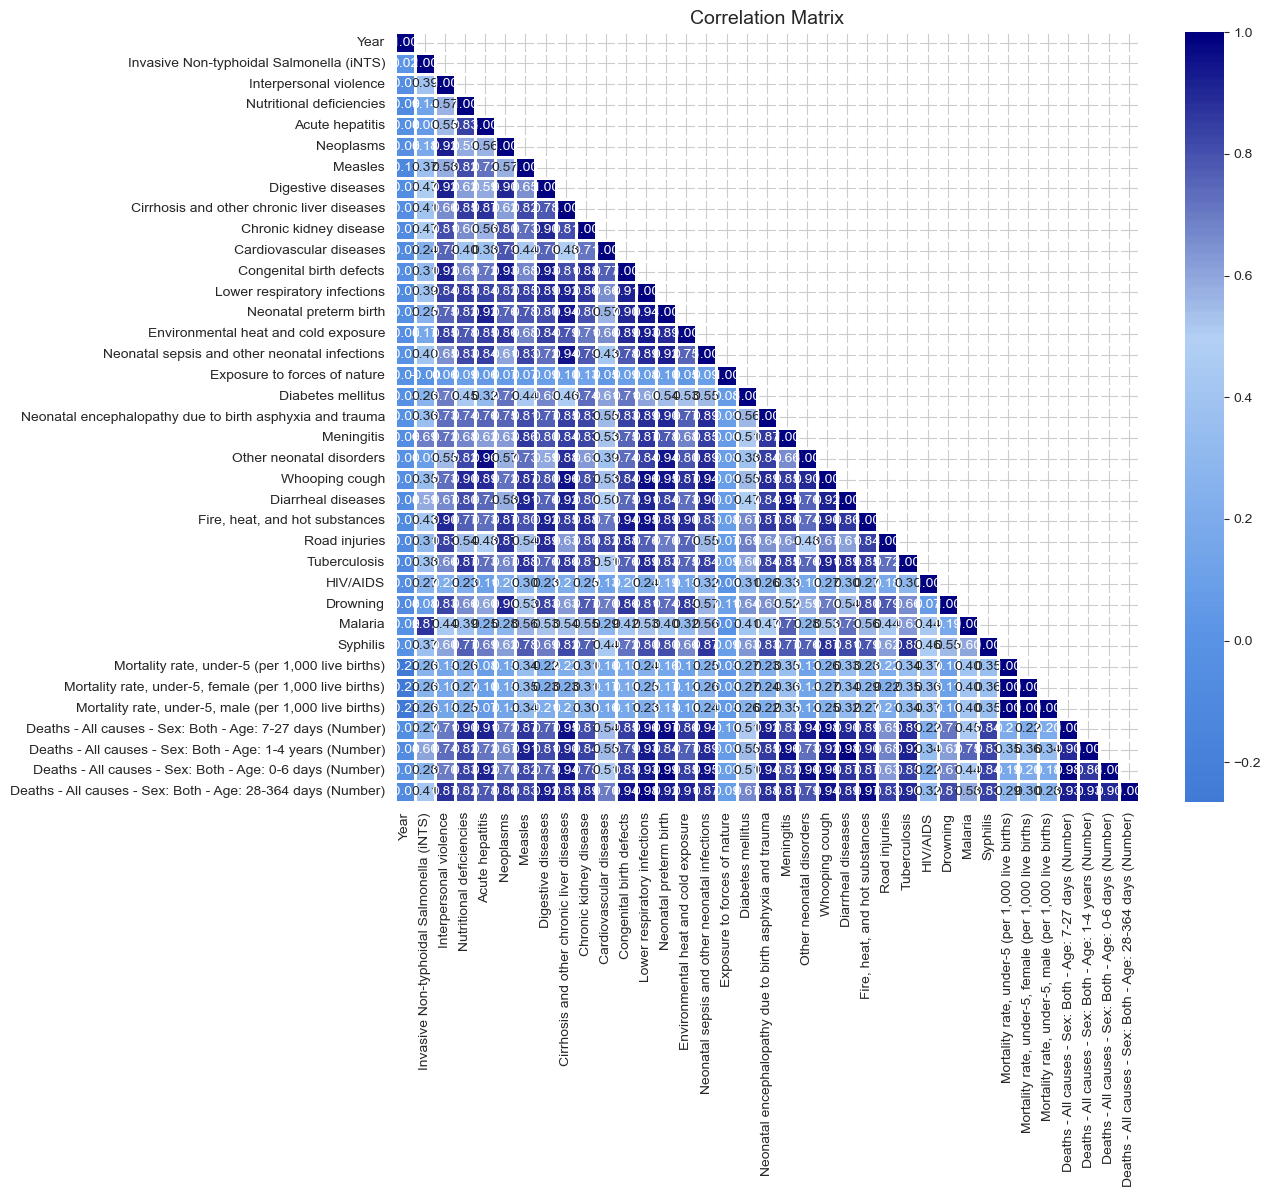

In [29]:
#Correlation Analysis
from matplotlib.colors import LinearSegmentedColormap
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'ID' column
corr = mortality_df.drop(columns=['Entity']).corr()

# Define a custom colormap
colors = ['#0047AB', '#2D65C9', '#5993E5', '#B3D0F4', '#000080']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.savefig('Correlation_Matrix')
plt.show()

In [30]:
# Assuming df is your DataFrame
corr_matrix = mortality_df.corr()

# Print correlation matrix
print(corr_matrix)


                                                        Year  \
Year                                                1.000000   
Invasive Non-typhoidal Salmonella (iNTS)            0.023643   
Interpersonal violence                             -0.046655   
Nutritional deficiencies                           -0.091325   
Acute hepatitis                                    -0.031466   
Neoplasms                                          -0.048744   
Measles                                            -0.130034   
Digestive diseases                                 -0.061898   
Cirrhosis and other chronic liver diseases         -0.048511   
Chronic kidney disease                             -0.069199   
Cardiovascular diseases                            -0.074299   
Congenital birth defects                           -0.045224   
Lower respiratory infections                       -0.075512   
Neonatal preterm birth                             -0.039910   
Environmental heat and cold exposure    

## TIME-SERIES MODEL

In [31]:
mortality_df.head()

Entity  Year  Invasive Non-typhoidal Salmonella (iNTS)  \
0  Afghanistan  1990                                        48   
1      Albania  1990                                         0   
2      Algeria  1990                                        16   
3      Andorra  1990                                         0   
4       Angola  1990                                       255   

   Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
0                     105                      1779              718   
1                       5                        33                3   
2                      17                       316               92   
3                       0                         0                0   
4                      62                     10013              121   

   Neoplasms  Measles  Digestive diseases  \
0        431     8649                 477   
1         44      176                 136   
2        182     2599                 239   
3          0        0                   0   
4        335     5331                 370   

   Cirrhosis and other chronic liver diseases  ...  Drowning  Malaria  \
0                                         182  ...       776       21   
1                                          10  ...        34        0   
2                                          77  ...       310        0   
3                                           0  ...         0        0   
4                                          72  ...       815     4096   

   Syphilis  Mortality rate, under-5 (per 1,000 live births)  \
0       123                                        17.839999   
1        10                                         4.100000   
2       163                                         4.910000   
3         0                                         1.510000   
4      1363                                        22.280000   

   Mortality rate, under-5, female (per 1,000 live births)  \
0                                          17.389999         
1                                           3.690000         
2                                           4.480000         
3                                           1.270000         
4                                          21.089999         

   Mortality rate, under-5, male (per 1,000 live births)  \
0                                              18.25       
1                                               4.49       
2                                               5.32       
3                                               1.74       
4                                              23.40       

   Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
0                                               9869           
1                                                208           
2                                               6461           
3                                                  0           
4                                               8988           

   Deaths - All causes - Sex: Both - Age: 1-4 years (Number)  \
0                                              21812           
1                                                849           
2                                               6742           
3                                                  1           
4                                              46399           

   Deaths - All causes - Sex: Both - Age: 0-6 days (Number)  \
0                                              15560          
1                                                989          
2                                              13487          
3                                                  1          
4                                              15769          

   Deaths - All causes - Sex: Both - Age: 28-364 days (Number)  
0                                              30929            
1                                               1524            
2    

In [32]:
# Convert the 'Year' column to datetime
mortality_df['Year'] = pd.to_datetime(mortality_df['Year'], format='%Y')

# Set 'Year' column as the index
mortality_df.set_index('Year', inplace=True)

# Check the index to confirm it's set correctly
print(mortality_df.index)


DatetimeIndex(['1990-01-01', '1990-01-01', '1990-01-01', '1990-01-01',
               '1990-01-01', '1990-01-01', '1990-01-01', '1990-01-01',
               '1990-01-01', '1990-01-01',
               ...
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Year', length=5910, freq=None)


In [33]:
mortality_df.head()

Entity  Invasive Non-typhoidal Salmonella (iNTS)  \
Year                                                                
1990-01-01  Afghanistan                                        48   
1990-01-01      Albania                                         0   
1990-01-01      Algeria                                        16   
1990-01-01      Andorra                                         0   
1990-01-01       Angola                                       255   

            Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
Year                                                                            
1990-01-01                     105                      1779              718   
1990-01-01                       5                        33                3   
1990-01-01                      17                       316               92   
1990-01-01                       0                         0                0   
1990-01-01                      62                     10013              121   

            Neoplasms  Measles  Digestive diseases  \
Year                                                 
1990-01-01        431     8649                 477   
1990-01-01         44      176                 136   
1990-01-01        182     2599                 239   
1990-01-01          0        0                   0   
1990-01-01        335     5331                 370   

            Cirrhosis and other chronic liver diseases  \
Year                                                     
1990-01-01                                         182   
1990-01-01                                          10   
1990-01-01                                          77   
1990-01-01                                           0   
1990-01-01                                          72   

            Chronic kidney disease  ...  Drowning  Malaria  Syphilis  \
Year                                ...                                
1990-01-01                     211  ...       776       21       123   
1990-01-01                      10  ...        34        0        10   
1990-01-01                     138  ...       310        0       163   
1990-01-01                       0  ...         0        0         0   
1990-01-01                      99  ...       815     4096      1363   

            Mortality rate, under-5 (per 1,000 live births)  \
Year                                                          
1990-01-01                                        17.839999   
1990-01-01                                         4.100000   
1990-01-01                                         4.910000   
1990-01-01                                         1.510000   
1990-01-01                                        22.280000   

            Mortality rate, under-5, female (per 1,000 live births)  \
Year                                                                  
1990-01-01                                          17.389999         
1990-01-01                                           3.690000         
1990-01-01                                           4.480000         
1990-01-01                                           1.270000         
1990-01-01                                          21.089999         

            Mortality rate, under-5, male (per 1,000 live births)  \
Year                                                                
1990-01-01                                              18.25       
1990-01-01                                               4.49       
1990-01-01                                               5.32       
1990-01-01                                               1.74       
1990-01-01                                              23.40       

            Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
Year                                                                    
1990-01-01                                               9869           
1990-01-01                     

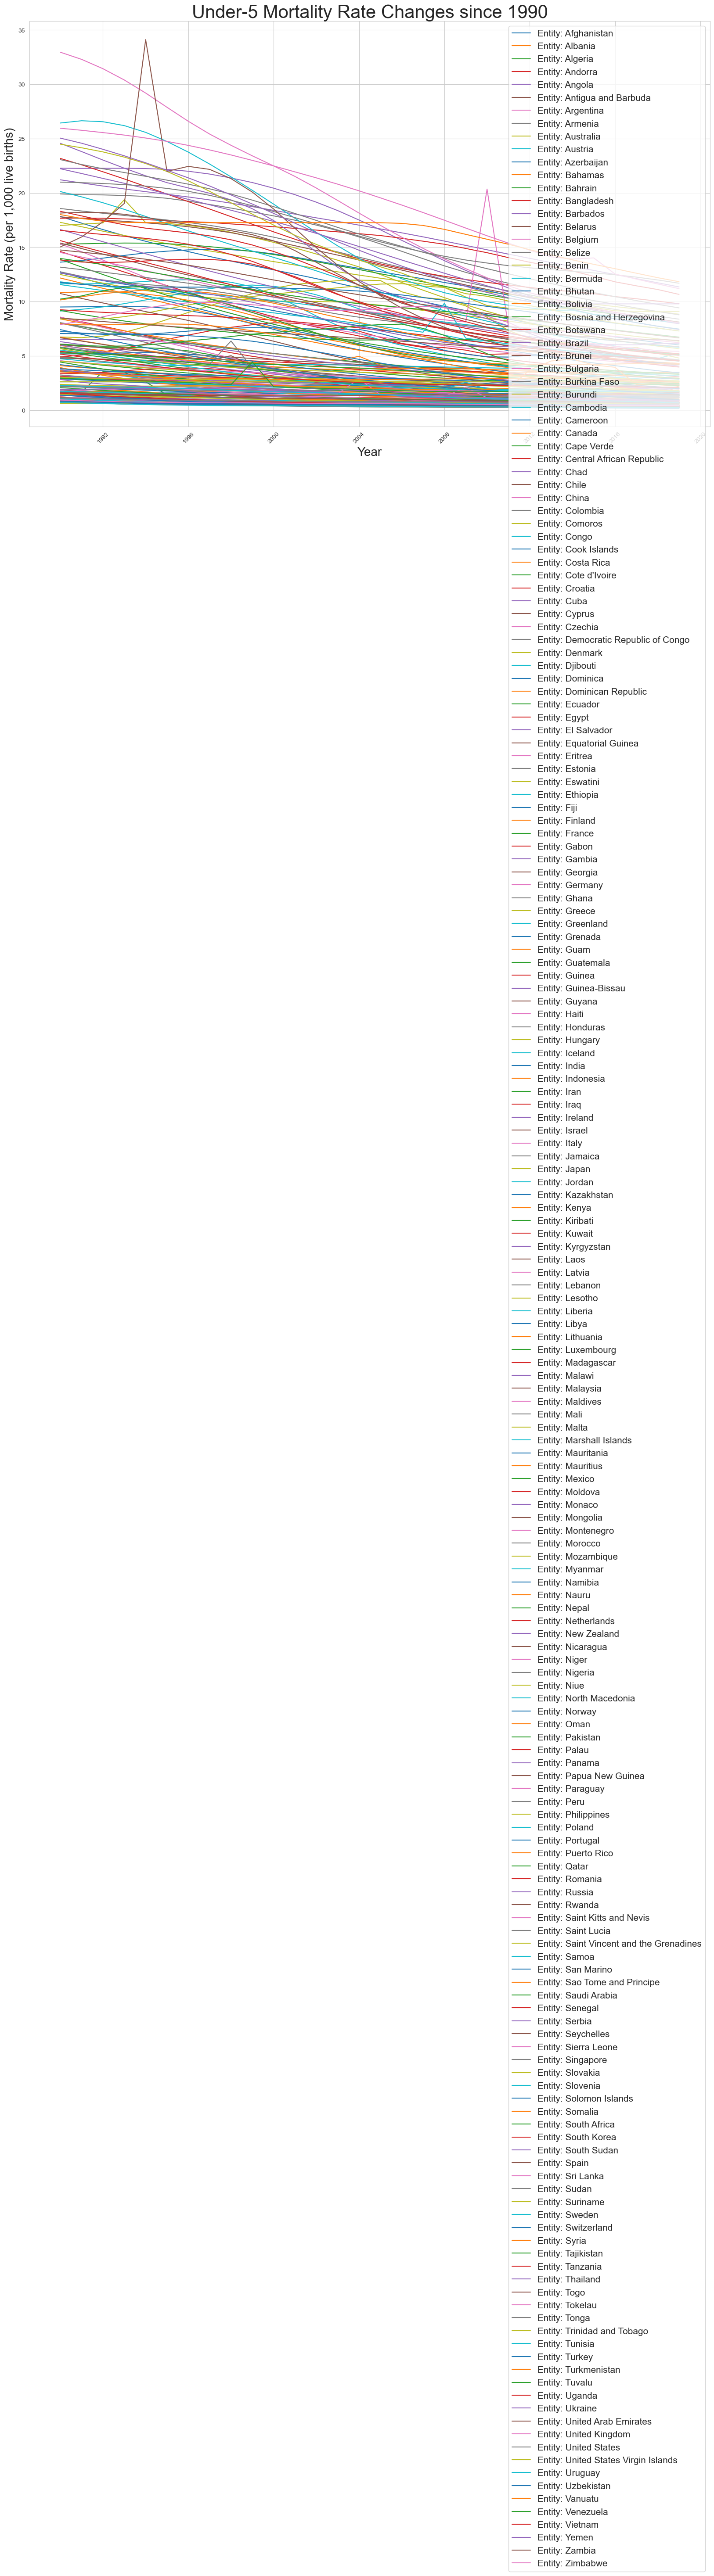

In [34]:
# Create a dictionary to store mortality rates for each entity
entity_dict = {}

# Iterate over unique entities
for entity in mortality_df['Entity'].unique():
    entity_dict[entity] = mortality_df[mortality_df['Entity'] == entity]['Mortality rate, under-5 (per 1,000 live births)']

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Plot mortality rates for each entity
for entity in entity_dict:
    ax.plot(entity_dict[entity], label=f'Entity: {entity}')

# Set plot title and labels
ax.set_title('Under-5 Mortality Rate Changes since 1990', fontsize=30)
ax.set_ylabel('Mortality Rate (per 1,000 live births)', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.legend(prop={'size': 15})
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('Under_5_Mortality_Rate_Changes.png')

# Show the plot
plt.show()


The data graphically presented above reveals a substantial decrease in mortality rates starting from the year 2000, followed by a consistent downward trend. This trend is characterized by varying rates of decline across different countries, with some experiencing rapid decreases while others show slower declines. This observation aligns with findings reported by [UNICEF](https://data.unicef.org/resources/levels-and-trends-in-child-mortality-2024/#:~:text=And%20since%202000%2C%20the%20global,health%20care%20professionals%20and%20families.) in a corresponding article.WE will use the data for time series analysis dates year 1990-2020 this will give us a total of 30 observations.

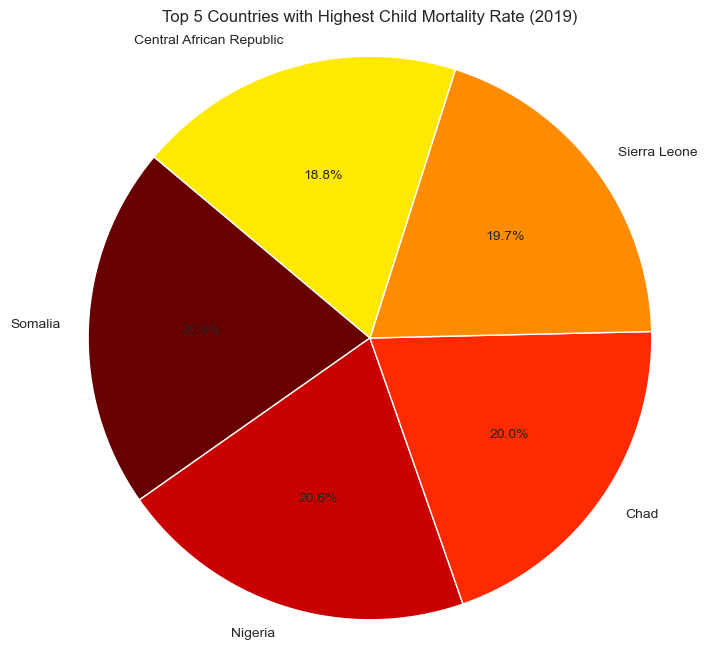

In [35]:
# Sort the countries by mortality rate and select the top 5
top_5_countries = world_map.sort_values(ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', colors=sns.color_palette('hot'), startangle=140)
plt.title('Top 5 Countries with Highest Child Mortality Rate (2019)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Top_5_Countries_with_Highest_Child_Mortality_Rate_(2019)_Pie_Chart.png')
plt.show()


the above pie-chart shows the countries that currently have the highest recorded mortality rates.Given that these countries are in close proximity or share similar socio-economic, demographic, healthcare, and environmental characteristics with Kenya, the analysis results are likely to be more relevant and applicable to your specific area of interest.

In [36]:
#Filter data for target countries
countries_of_interest = ['Somalia', 'Nigeria', 'Chad', 'Sierra Leone', 'Central African Republic']
countries = mortality_df[mortality_df['Entity'].isin(countries_of_interest)]

print(countries)


                              Entity  \
Year                                   
1990-01-01  Central African Republic   
1990-01-01                      Chad   
1990-01-01                   Nigeria   
1990-01-01              Sierra Leone   
1990-01-01                   Somalia   
...                              ...   
2019-01-01  Central African Republic   
2019-01-01                      Chad   
2019-01-01                   Nigeria   
2019-01-01              Sierra Leone   
2019-01-01                   Somalia   

            Invasive Non-typhoidal Salmonella (iNTS)  Interpersonal violence  \
Year                                                                           
1990-01-01                                       100                      21   
1990-01-01                                       407                      56   
1990-01-01                                     10229                    1089   
1990-01-01                                       353                      14   

In [37]:
filtered_data = countries[['Entity', 'Mortality rate, under-5 (per 1,000 live births)']].copy()
filtered_data.reset_index(inplace=True)

# Rename the column
filtered_data.rename(columns={'Mortality rate, under-5 (per 1,000 live births)': 'Mortality_rate'}, inplace=True)

# Step 4: Data preprocessing for the selected top 5 Countries.

In [38]:
filtered_data.head()

Year                    Entity  Mortality_rate
0 1990-01-01  Central African Republic       17.670000
1 1990-01-01                      Chad       21.210001
2 1990-01-01                   Nigeria       21.000000
3 1990-01-01              Sierra Leone       25.960001
4 1990-01-01                   Somalia       18.010001

In [39]:
filtered_data.tail()

Year                    Entity  Mortality_rate
145 2019-01-01  Central African Republic           10.66
146 2019-01-01                      Chad           11.35
147 2019-01-01                   Nigeria           11.69
148 2019-01-01              Sierra Leone           11.19
149 2019-01-01                   Somalia           11.83

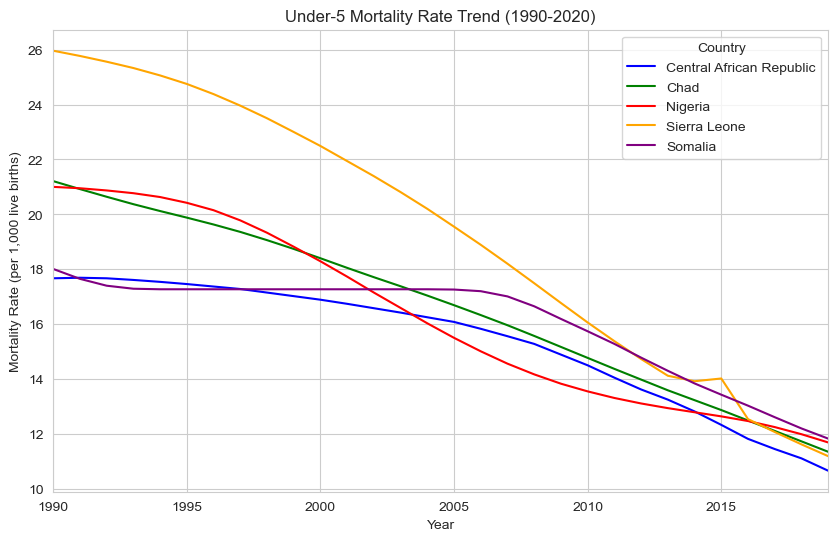

In [40]:
# Pivot the data
pivot_data = filtered_data.pivot(index='Year', columns='Entity', values='Mortality_rate')

# Define colors for each country
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot trend lines with different colors
pivot_data.plot(figsize=(10, 6), color=colors)
plt.title('Under-5 Mortality Rate Trend (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.grid(True)
plt.legend(title='Country')
plt.show()

#### Stationarity test

In [41]:
print(filtered_data.isnull().sum())

Year              0
Entity            0
Mortality_rate    0
dtype: int64


In [42]:
print(filtered_data['Mortality_rate'].isnull().sum())

0


In [43]:
# Set 'Year' as index
filtered_data.set_index('Year', inplace=True)

In [44]:
country_dfs = []

# List of unique countries
countries = filtered_data['Entity'].unique()

# Create a separate dataframe for each country and append to the list
for country in countries:
    country_df = filtered_data[filtered_data['Entity'] == country].copy()
    country_dfs.append(country_df)

# Accessing dataframes by index
for i, country_df in enumerate(country_dfs):
    print(f"\nData for {countries[i]}:")
    print(country_df)



Data for Central African Republic:
                              Entity  Mortality_rate
Year                                                
1990-01-01  Central African Republic       17.670000
1991-01-01  Central African Republic       17.689999
1992-01-01  Central African Republic       17.670000
1993-01-01  Central African Republic       17.610001
1994-01-01  Central African Republic       17.539999
1995-01-01  Central African Republic       17.460001
1996-01-01  Central African Republic       17.370000
1997-01-01  Central African Republic       17.280000
1998-01-01  Central African Republic       17.150000
1999-01-01  Central African Republic       17.020000
2000-01-01  Central African Republic       16.889999
2001-01-01  Central African Republic       16.739999
2002-01-01  Central African Republic       16.580000
2003-01-01  Central African Republic       16.420000
2004-01-01  Central African Republic       16.250000
2005-01-01  Central African Republic       16.080000
2006-01-01

In [45]:
# Check for missing values in each dataframe
for i, country_df in enumerate(country_dfs):
    print(f"\nMissing values in data for {countries[i]}:")
    missing_values = country_df.isna().sum()  # Use either isna() or isnull()
    print(missing_values)



Missing values in data for Central African Republic:
Entity            0
Mortality_rate    0
dtype: int64

Missing values in data for Chad:
Entity            0
Mortality_rate    0
dtype: int64

Missing values in data for Nigeria:
Entity            0
Mortality_rate    0
dtype: int64

Missing values in data for Sierra Leone:
Entity            0
Mortality_rate    0
dtype: int64

Missing values in data for Somalia:
Entity            0
Mortality_rate    0
dtype: int64


## Stationarity Test 
we use the plotted acf and pacf plot to determine wether the data is stationary and if the data requires differencing before fitting of ARIMA model.

#### Augmented Dickey-Fuller Test
The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary or not.To perform the Dickey-Fuller test in Python, you can use the adfuller function from the statsmodels library.


Data for Central African Republic:
                              Entity  Mortality_rate
Year                                                
1990-01-01  Central African Republic       17.670000
1991-01-01  Central African Republic       17.689999
1992-01-01  Central African Republic       17.670000
1993-01-01  Central African Republic       17.610001
1994-01-01  Central African Republic       17.539999
ADF Statistic for Central African Republic: 0.3363487057073633
P-value for ADF Test for Central African Republic: 0.9789520443645282
Critical Values for Central African Republic:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307
Fail to reject the null hypothesis. Data for Central African Republic is not stationary.



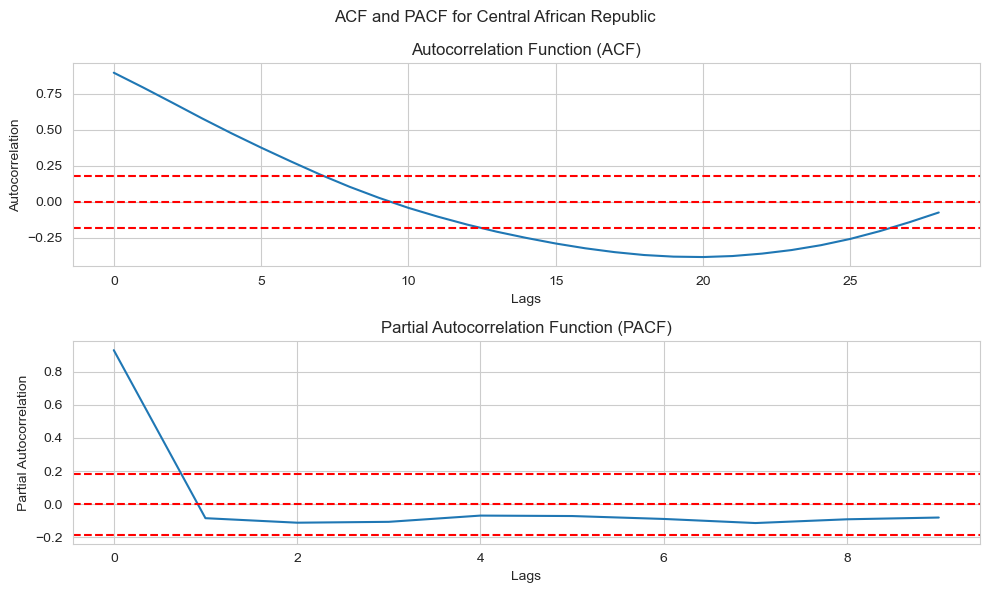


Data for Chad:
           Entity  Mortality_rate
Year                             
1990-01-01   Chad       21.210001
1991-01-01   Chad       20.920000
1992-01-01   Chad       20.639999
1993-01-01   Chad       20.370000
1994-01-01   Chad       20.120000
ADF Statistic for Chad: -2.073811767472102
P-value for ADF Test for Chad: 0.2551745479608349
Critical Values for Chad:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373
Fail to reject the null hypothesis. Data for Chad is not stationary.



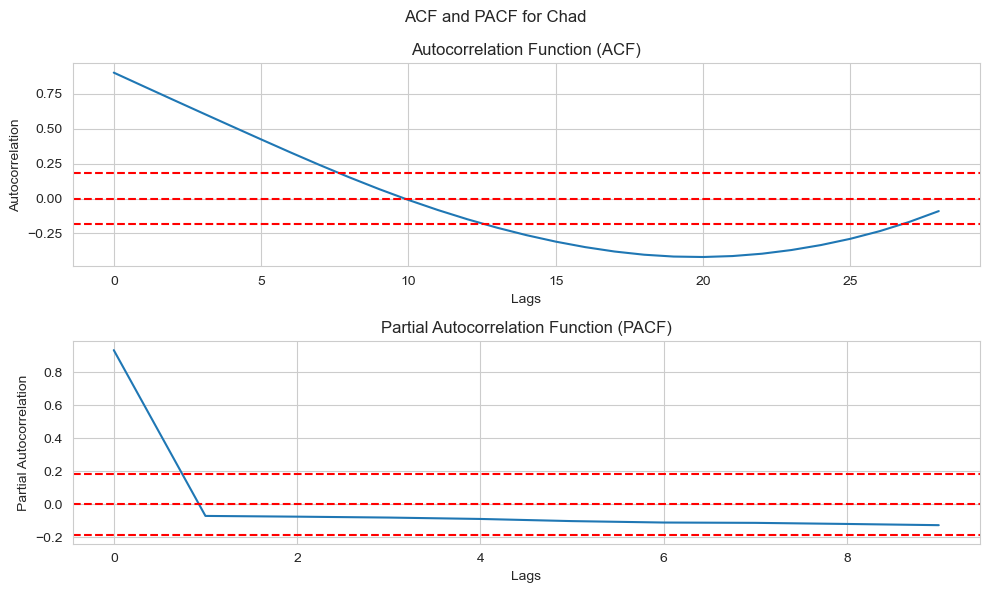


Data for Nigeria:
             Entity  Mortality_rate
Year                               
1990-01-01  Nigeria           21.00
1991-01-01  Nigeria           20.95
1992-01-01  Nigeria           20.87
1993-01-01  Nigeria           20.77
1994-01-01  Nigeria           20.63
ADF Statistic for Nigeria: 1.2932670556343884
P-value for ADF Test for Nigeria: 0.9965709703959159
Critical Values for Nigeria:
	1%: -3.7883858816542486
	5%: -3.013097747543462
	10%: -2.6463967573696143
Fail to reject the null hypothesis. Data for Nigeria is not stationary.



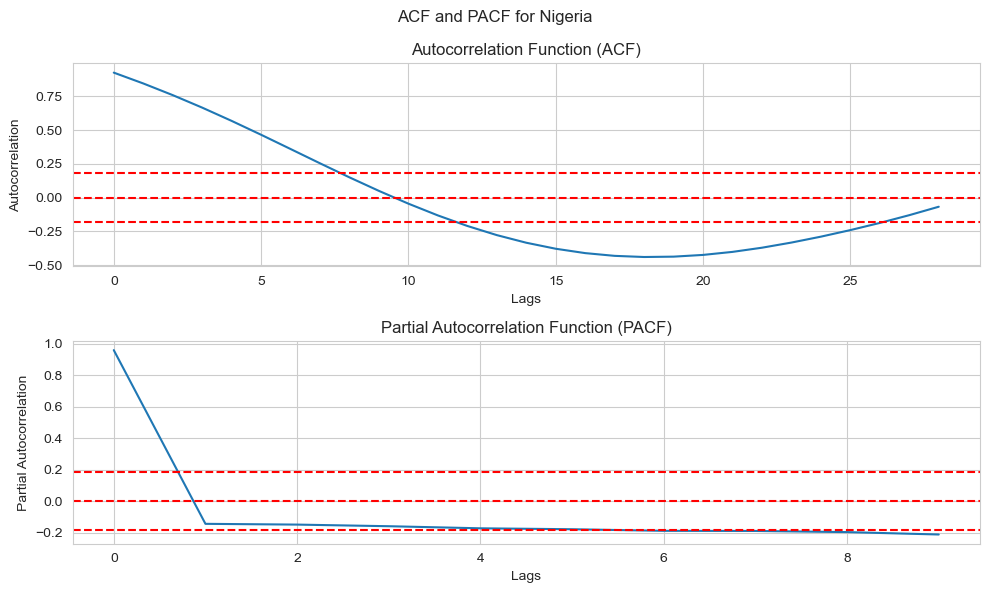


Data for Sierra Leone:
                  Entity  Mortality_rate
Year                                    
1990-01-01  Sierra Leone       25.960001
1991-01-01  Sierra Leone       25.770001
1992-01-01  Sierra Leone       25.560001
1993-01-01  Sierra Leone       25.330000
1994-01-01  Sierra Leone       25.060001
ADF Statistic for Sierra Leone: 1.6392363201241942
P-value for ADF Test for Sierra Leone: 0.9979706421792996
Critical Values for Sierra Leone:
	1%: -3.6790595944893187
	5%: -2.9678817237279103
	10%: -2.6231583472057074
Fail to reject the null hypothesis. Data for Sierra Leone is not stationary.



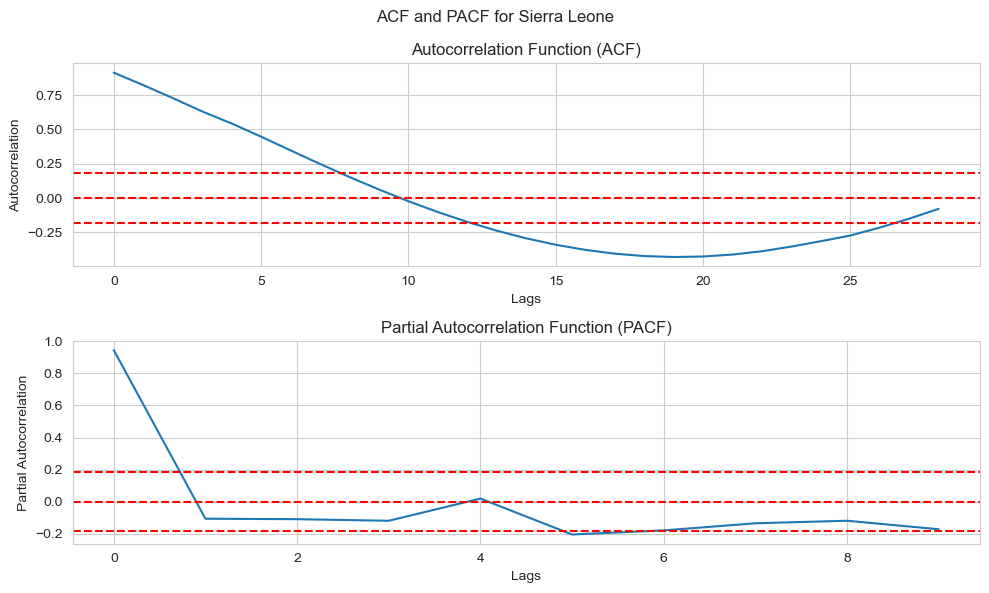


Data for Somalia:
             Entity  Mortality_rate
Year                               
1990-01-01  Somalia       18.010001
1991-01-01  Somalia       17.650000
1992-01-01  Somalia       17.400000
1993-01-01  Somalia       17.289999
1994-01-01  Somalia       17.270000
ADF Statistic for Somalia: -0.6546294846463648
P-value for ADF Test for Somalia: 0.8581542260853945
Critical Values for Somalia:
	1%: -3.7112123008648155
	5%: -2.981246804733728
	10%: -2.6300945562130176
Fail to reject the null hypothesis. Data for Somalia is not stationary.



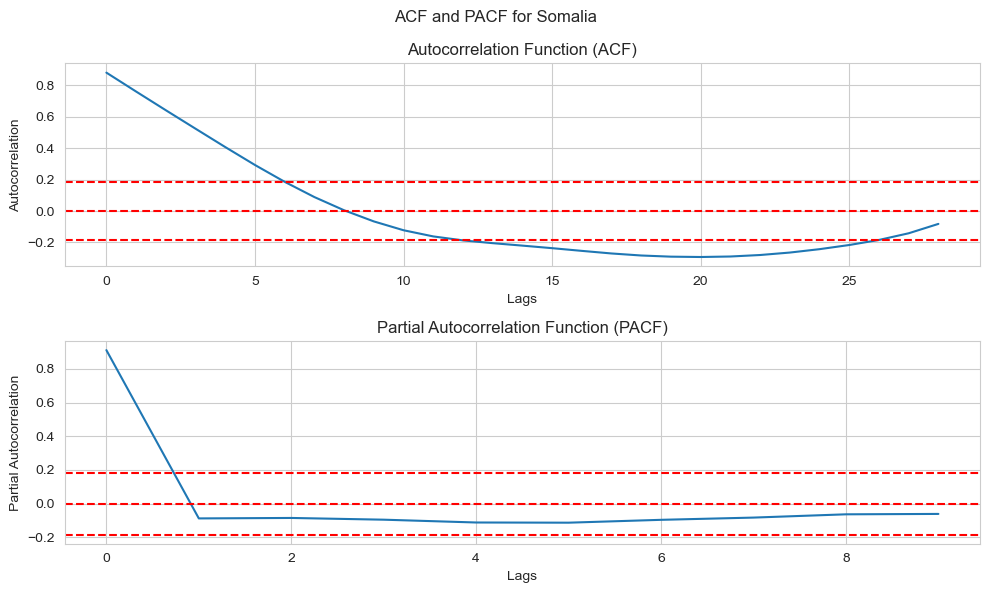

Finished analyzing all countries.


In [46]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
import matplotlib.pyplot as plt

# Accessing dataframes by index
for i, country_df in enumerate(country_dfs):
    country_name = countries[i]  # Get the name of the country
    print(f"\nData for {country_name}:")
    print(country_df.head())

    # Time series data (where 'Mortality_rate' is the column)
    ts = country_df['Mortality_rate'].dropna()

    # Perform the ADF test
    result = adfuller(ts)

    # Print the ADF test results
    print(f"ADF Statistic for {country_name}: {result[0]}")
    print(f"P-value for ADF Test for {country_name}: {result[1]}")
    print(f"Critical Values for {country_name}:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

    # Interpret the ADF test results
    if result[1] > 0.05:
        print(f"Fail to reject the null hypothesis. Data for {country_name} is not stationary.\n")
    else:
        print(f"Reject the null hypothesis. Data for {country_name} is stationary.\n")

    # Plot ACF and PACF (only if data is not stationary based on ADF test)
    if result[1] > 0.05:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))  # Create a subplot figure

        # Plot ACF
        acf_lags = acf(ts, nlags=len(ts))  # Calculate ACF values
        ax1.plot(acf_lags[1:])  # Plot ACF (excluding the first lag which is always 1)
        ax1.axhline(0, color='red', linestyle='--', label='Confidence Interval')  # Add confidence interval line
        ax1.axhline(-np.sqrt(1/len(ts)), color='red', linestyle='--')
        ax1.axhline(np.sqrt(1/len(ts)), color='red', linestyle='--')
        ax1.set_title('Autocorrelation Function (ACF)')
        ax1.set_xlabel('Lags')
        ax1.set_ylabel('Autocorrelation')

        # Option 1: Specify a lower nlags value
        max_lags = len(ts) // 2  # Maximum allowed lags (half the sample size)
        nlags = min(10, max_lags)  # Choose minimum of 10 or the maximum allowed lags

        pacf_lags = pacf(ts, nlags=nlags)  # Calculate PACF with adjusted nlags

        # Option 2: Use alternative PACF calculation (example using ppacf)
        # from statsmodels.tsa.seasonal import ppacf
        # pacf_lags = ppacf(ts, nlags=max_lags)  # Adjust nlags as needed

        ax2.plot(pacf_lags[1:])  # Plot PACF (excluding the first lag which is always 1)
        ax2.axhline(0, color='red', linestyle='--', label='Confidence Interval')
        ax2.axhline(-np.sqrt(1/len(ts)), color='red', linestyle='--')
        ax2.axhline(np.sqrt(1/len(ts)), color='red', linestyle='--')
        ax2.set_title('Partial Autocorrelation Function (PACF)')
        ax2.set_xlabel('Lags')
        ax2.set_ylabel('Partial Autocorrelation')

        plt.suptitle(f"ACF and PACF for {country_name}", fontsize=12)  # Add subplot title
        plt.tight_layout()
        plt.show()

print("Finished analyzing all countries.")

After plotting ACF and PACF as well as doing the ADF test it is determined that our data is not stationary.

#### Seasonal Decomposition 
This is one way to prepare your data for ARIMA model by differecing to get the time series data to be stationary.

In [47]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Accessing dataframes by index
for i, country_df in enumerate(country_dfs):
    country_name = countries[i]  # Get the name of the country
    print(f"\nData for {country_name}:")
    print(country_df.head())

    # Time series data (where 'Mortality_rate' is the column)
    ts = country_df['Mortality_rate'].dropna()

    # Perform seasonal decomposition for yearly data
    decomposition = seasonal_decompose(ts, model='additive', period=1)  # Set period to 1 for yearly data


    # Check if the residual series has enough variability
    if decomposition.resid.var() == 0:
        print(f"The residual series for {country_name} has no variability. Skipping ADF test.")
    else:
        # Perform the ADF test on the residual series
        result = adfuller(decomposition.resid.dropna())

        # Print the ADF test results
        print(f"ADF Statistic for {country_name}: {result[0]}")
        print(f"P-value for ADF Test for {country_name}: {result[1]}")
        print(f"Critical Values for {country_name}:")
        for key, value in result[4].items():
            print(f"\t{key}: {value}")

        # Interpret the ADF test results
        if result[1] > 0.05:
            print(f"Fail to reject the null hypothesis. Residual series for {country_name} is not stationary.\n")
        else:
            print(f"Reject the null hypothesis. Residual series for {country_name} is stationary.\n")

print("Finished analyzing all countries.")



Data for Central African Republic:
                              Entity  Mortality_rate
Year                                                
1990-01-01  Central African Republic       17.670000
1991-01-01  Central African Republic       17.689999
1992-01-01  Central African Republic       17.670000
1993-01-01  Central African Republic       17.610001
1994-01-01  Central African Republic       17.539999
The residual series for Central African Republic has no variability. Skipping ADF test.

Data for Chad:
           Entity  Mortality_rate
Year                             
1990-01-01   Chad       21.210001
1991-01-01   Chad       20.920000
1992-01-01   Chad       20.639999
1993-01-01   Chad       20.370000
1994-01-01   Chad       20.120000
The residual series for Chad has no variability. Skipping ADF test.

Data for Nigeria:
             Entity  Mortality_rate
Year                               
1990-01-01  Nigeria           21.00
1991-01-01  Nigeria           20.95
1992-01-01  Nigeria 

Skipping ADF test finished analyzing all countries.These results indicate that our data is still not stationary after seasona decomposition.

####  Differencing

Is often applied to achieve stationarity by removing trends or seasonal components from the time series data. If the original series is non-stationary (which is the case for Entities Somalia, Sierra Leone and Central African Republic), differencing is necessary to make the series stationary before further analysis or modeling.

#### High Order Differencing 

In [48]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Specify the order of differencing
order = 4  # You can adjust this value based on the data and the results

# Perform high-order differencing for each entity and save to a dictionary
ts_dict = {}

for i, country_df in enumerate(country_dfs):
    country_name = countries[i]  # Get the name of the country
    print(f"\nData for {country_name}:")
    print(country_df.head())
    
    # Apply high-order differencing
    ts_diff = country_df['Mortality_rate'].diff(periods=order).dropna()
    
    # Save the differenced data to the dictionary
    ts_dict[country_name] = ts_diff

    # Print ADFuller test results
    results = adfuller(ts_diff)
    print(f'ADFuller test p-value for {country_name} (order {order} differencing):')
    print('p-value:', results[1])

    if results[1] > 0.05:
        print(f'Fail to reject the null hypothesis. Data is not stationary after order {order} differencing.\n')
    else:
        print(f'Reject the null hypothesis. Data is stationary after order {order} differencing.\n')




Data for Central African Republic:
                              Entity  Mortality_rate
Year                                                
1990-01-01  Central African Republic       17.670000
1991-01-01  Central African Republic       17.689999
1992-01-01  Central African Republic       17.670000
1993-01-01  Central African Republic       17.610001
1994-01-01  Central African Republic       17.539999
ADFuller test p-value for Central African Republic (order 4 differencing):
p-value: 0.7560836505948887
Fail to reject the null hypothesis. Data is not stationary after order 4 differencing.


Data for Chad:
           Entity  Mortality_rate
Year                             
1990-01-01   Chad       21.210001
1991-01-01   Chad       20.920000
1992-01-01   Chad       20.639999
1993-01-01   Chad       20.370000
1994-01-01   Chad       20.120000
ADFuller test p-value for Chad (order 4 differencing):
p-value: 0.0014891945999815281
Reject the null hypothesis. Data is stationary after order 4 d

For Somalia, Nigeria, and Chad, the data appears to be stationary after order 4 differencing.
For Sierra Leone and Central African Republic, the data remains non-stationary even after order 4 differencing.Opting to use  only one model for all the datasets, one can opt for SARIMA, which can handle both stationary and non-stationary time series data. SARIMA is an extension of the ARIMA model that includes seasonal components, making it suitable for modeling datasets with both trend and seasonality.Using SARIMA for all datasets simplifies the modeling process by applying a consistent approach across different datasets, which can be convenient if you want a unified modeling strategy. However, keep in mind that SARIMA assumes the presence of seasonality, so it may introduce unnecessary complexity for datasets that are already stationary after differencing.



Before proceeding with modeling we save our new time series data

In [49]:
# Convert country_dfs list to a dictionary with country names as keys
country_dfs_dict = {country_df['Entity'].iloc[0]: country_df for country_df in country_dfs}

# Now you can access country data using country names as keys
# For Central African Republic
ts_central_african_republic = country_dfs_dict['Central African Republic']['Mortality_rate'].diff().dropna()

# For Nigeria
ts_nigeria = country_dfs_dict['Nigeria']['Mortality_rate'].diff().dropna()

# For Chad
ts_chad = country_dfs_dict['Chad']['Mortality_rate'].diff().dropna()

# For Sierra Leone
ts_sierra_leone = country_dfs_dict['Sierra Leone']['Mortality_rate'].diff().dropna()

# For Somalia
ts_somalia = country_dfs_dict['Somalia']['Mortality_rate'].diff().dropna()


# Modelling 

## ARIMA MODEL.
Also known in full AutoRegressive Integrated Moving Average.ARIMA models are a powerful tool for time series forecasting, commonly used for time series forecasting .
Select Non-seasonal Parameters: Determine the non-seasonal AR, I, and MA orders by examining the autocorrelation and partial autocorrelation functions of the differenced data.
Fit the ARIMA Model: Utilize the identified non-seasonal parameters to fit the ARIMA model to the differenced data.
Model Evaluation: Evaluate the fitted ARIMA model by inspecting diagnostic plots, such as autocorrelation function (ACF) and partial autocorrelation function (PACF) plots, and by calculating information criteria like AIC and BIC to ensure adequacy in capturing the underlying data patterns.
Forecasting: Once the ARIMA model is fitted and validated, utilize it to generate forecasts for future time periods.
Monitoring and Updating: Continuously monitor the performance of the ARIMA model and update it as needed, considering any shifts or changes in the data patterns.

#### Basic SARIMA Model.

Using a baseline model first is a necessary approach in time series forecasting as it helps in gaining insights into the data, assessing model performance, and guiding subsequent modeling efforts.

#### Plot (ACF) and (PACF)
Autocorrelation function and Partial autocorrelation function is a method use to provide insight into the selection of ones (p,d,q) as well as (p,d,q,s) which are our seasonal orders for a SARIMA model. Hence why it's generally recommended to visually inspect the ACF and PACF plots to guide the selection process, especially when dealing with complex or ambiguous time series patterns.
For one to determine the maximum lag to plot acf and pacf we first check length of our time series data.This information is crucial for determining the appropriate lag values to use when plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

In [50]:
# Check the length of each time series data
length_ts_central_african_republic = len(ts_central_african_republic)
length_ts_nigeria = len(ts_nigeria)
length_ts_chad = len(ts_chad)
length_ts_sierra_leone = len(ts_sierra_leone)
length_ts_somalia = len(ts_somalia)

print("Length of ts_central_african_republic:", length_ts_central_african_republic)
print("Length of ts_nigeria:", length_ts_nigeria)
print("Length of ts_chad:", length_ts_chad)
print("Length of ts_sierra_leone:", length_ts_sierra_leone)
print("Length of ts_somalia:", length_ts_somalia)


Length of ts_central_african_republic: 29
Length of ts_nigeria: 29
Length of ts_chad: 29
Length of ts_sierra_leone: 29
Length of ts_somalia: 29


In [51]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf_for_series(series, series_name, alags=None, plags=None):
    # Calculate default number of lags if not provided
    if alags is None:
        alags = min(10, len(series) - 1)  # Maximum of 10 lags or length of series - 1
    if plags is None:
        plags = min(10, len(series) - 1)  # Maximum of 10 lags or length of series - 1
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot ACF
    plot_acf(series, ax=axes[0], lags=alags)
    axes[0].set_title(f'Autocorrelation Function (ACF) for {series_name}')

    # Plot PACF
    plot_pacf(series, ax=axes[1], lags=plags)
    axes[1].set_title(f'Partial Autocorrelation Function (PACF) for {series_name}')

    plt.tight_layout()
    plt.show()


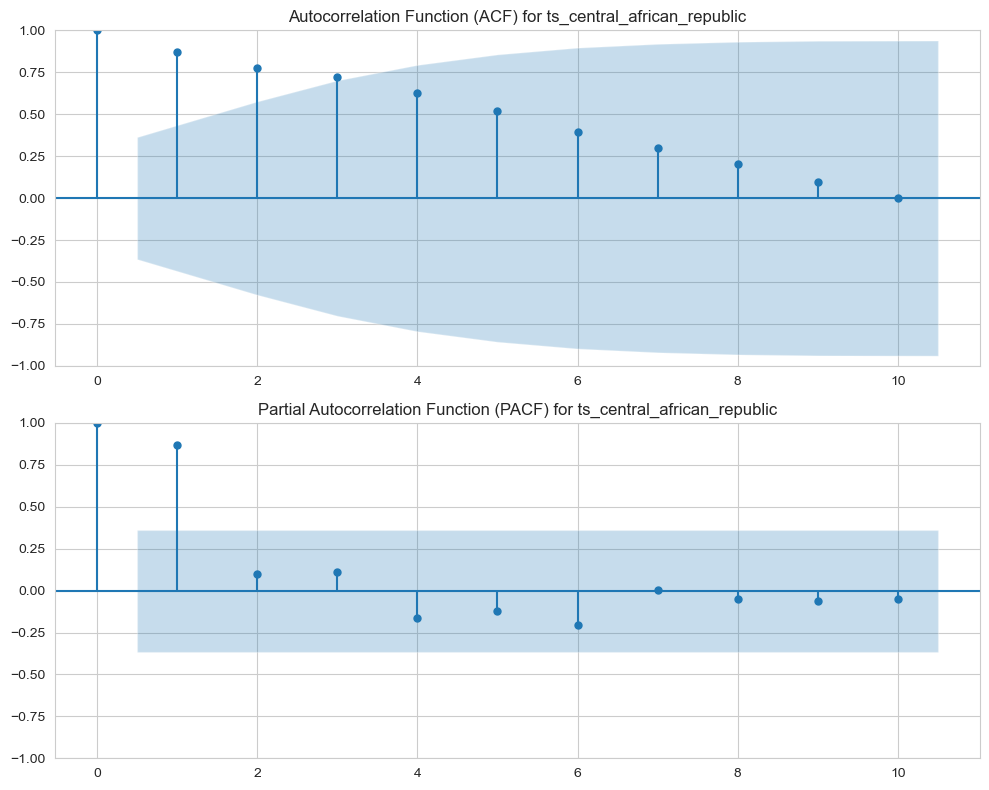

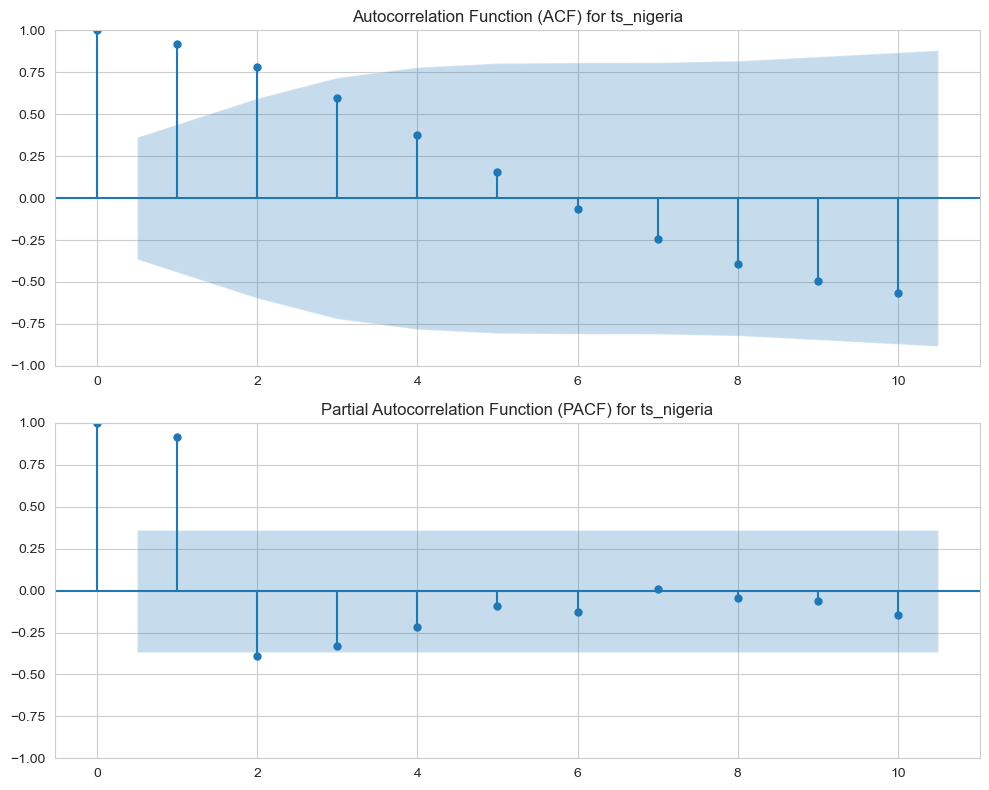

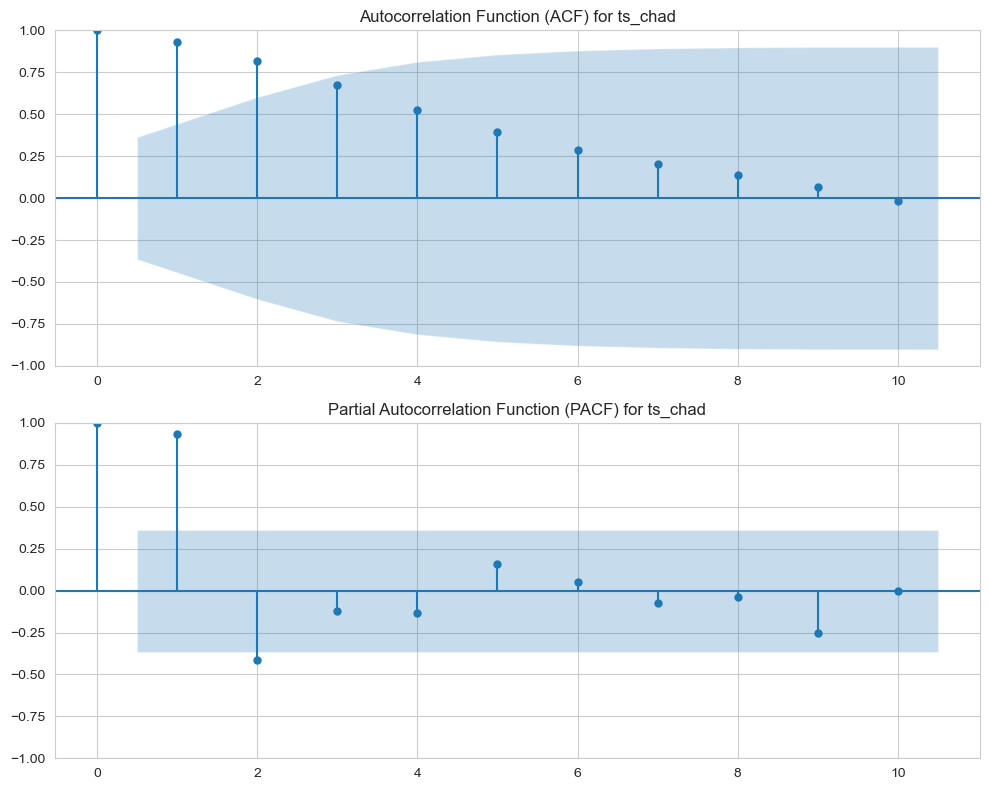

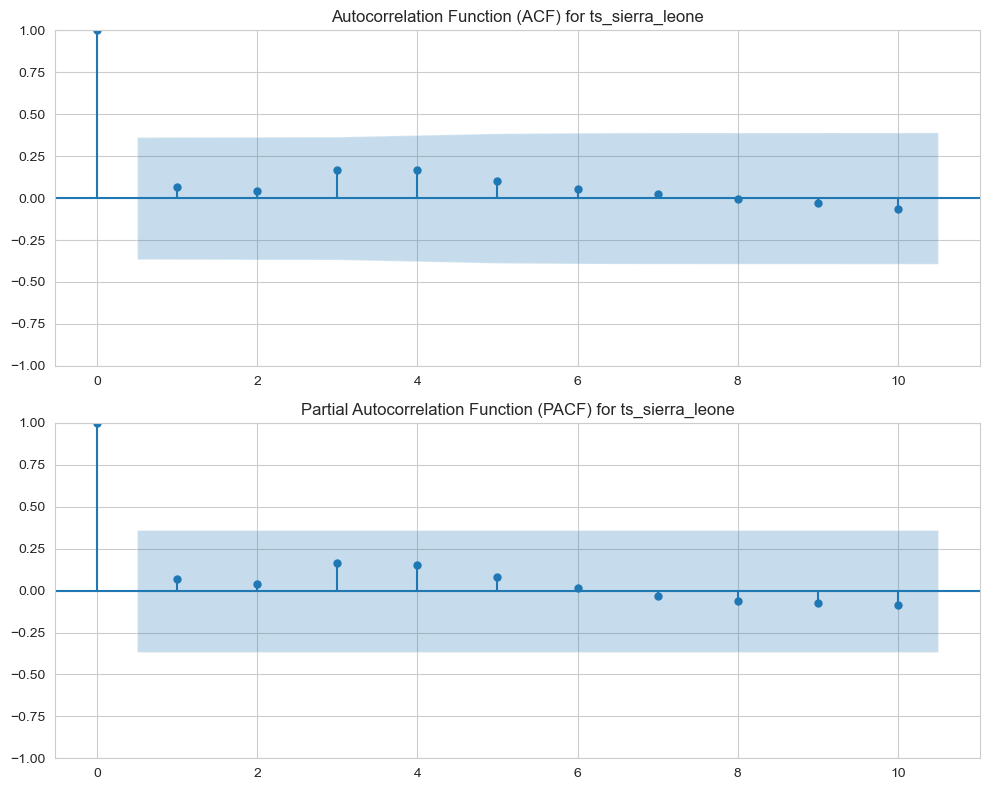

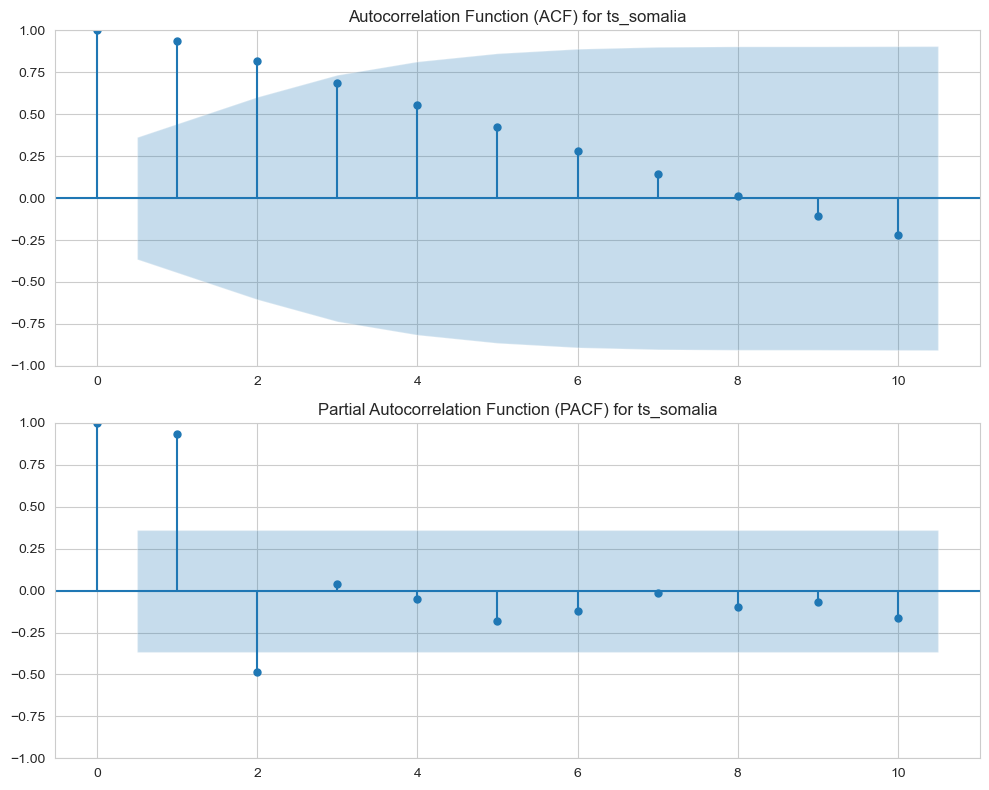

In [52]:
plot_acf_pacf_for_series(ts_central_african_republic, 'ts_central_african_republic', alags=None, plags=None)
plot_acf_pacf_for_series(ts_nigeria, 'ts_nigeria', alags=None, plags=None)
plot_acf_pacf_for_series(ts_chad, 'ts_chad', alags=None, plags=None)
plot_acf_pacf_for_series(ts_sierra_leone, 'ts_sierra_leone', alags=None, plags=None)
plot_acf_pacf_for_series(ts_somalia, 'ts_somalia', alags=None, plags=None)


## BASELINE SARIMA MODEL 

In [53]:
# List of country names
countries = ['Somalia', 'Nigeria', 'Chad', 'Sierra Leone', 'Central African Republic']

# Dictionary to store time series data
ts_dict = {
    'central_african_republic': ts_central_african_republic,
    'nigeria': ts_nigeria,
    'chad': ts_chad,
    'sierra_leone': ts_sierra_leone,
    'somalia': ts_somalia
}

from pmdarima import auto_arima as pm

# Loop through each country in the list
for country in countries:
    # Get the lowercase version of the country name without spaces
    country_key = country.lower().replace(" ", "_")
    
    # Get the time series data using the lowercase key
    ts = ts_dict[country_key]

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 80% for training
    split_idx = len(ts) - 3  # Using the last 3 years for testing

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the SARIMA model with automatic selection of parameters
    model = pm(train, seasonal=True, m=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model.fit(train)
    
    # Print model summary to identify the best p,d,q
    print(f"Summary for {country}:")
    print(model.summary())
    print()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-62.172, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-82.907, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-64.157, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-86.175, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-85.837, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-89.168, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-87.160, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.188 seconds
Summary for Somalia:
                               SARIMAX Results                                
Dep. Variable:      

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19.411, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19.290, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18.017, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.858 seconds
Summary for Sierra Leone:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -8.009
Date:                Fri, 03 May 2024   AIC                             18.017
Time:                        21:19:24   BIC                             19.236
Sample:                    01-01-1991   HQIC                            18.355
                         - 01-01-2016           

Somalia:
The best-fitting model for Somalia has an AIC of -89.168.
This model is a SARIMA(1, 1, 1) with an intercept term.
The negative AIC value indicates a good fit relative to other models considered.
Lower AIC values indicate better fitting models, so this SARIMA model is preferred over others.

Nigeria:
The best-fitting model for Nigeria has an AIC of -127.777.
This model is a SARIMA(3, 0, 0) with an intercept term.
Similar to Somalia, the negative AIC value indicates a good fit relative to other models considered.

Chad:
The best-fitting model for Chad has an AIC of -145.373.
This model is a SARIMA(2, 1, 1) with an intercept term.
Again, the negative AIC value indicates a good fit relative to other models considered.

Sierra Leone:
The best-fitting model for Sierra Leone has an AIC of 18.017.
This model is a SARIMA(0, 1, 0) without an intercept term.
In this case, a positive AIC value indicates that the SARIMA model may not be a good fit for the data.

Central African Republic:
The best-fitting model for the Central African Republic has an AIC of -94.328.
This model is a SARIMA(0, 1, 0) with an intercept term.
As with the other countries, the negative AIC value indicates a good fit relative to other models considered.

#### Forecasting 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5.742, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-51.322, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.173, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-73.789, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-75.153, Time=0.31 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-84.833, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-85.443, Time=0.32 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-80.523, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-85.763, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-82.962, Time=0.37 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-85.081, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-81.527, Time=0.45 s

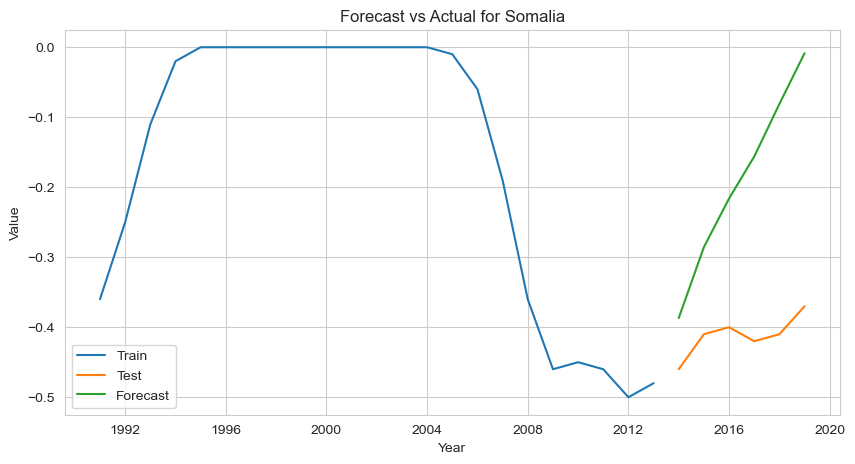

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-81.700, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11.557, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-66.243, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24.029, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-86.746, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-54.154, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-81.609, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-93.740, Time=0.39 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-103.342, Time=0.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-91.714, Time=0.98 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-89.896, Time=0.51 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-93.253, Time=0.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-108.480, Tim

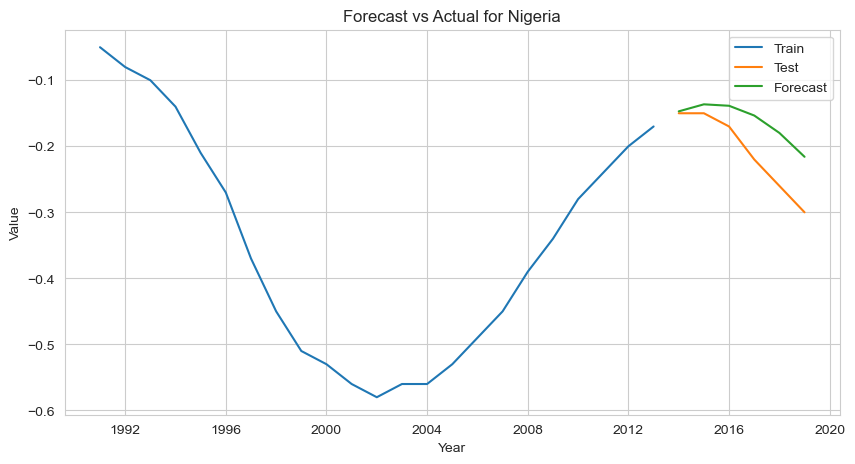

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-132.673, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-124.488, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-135.758, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-135.931, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-123.968, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-136.552, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-141.723, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-137.673, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-133.880, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-134.641, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-136.881, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-137.727, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-136.934, Time=0.34 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 2.911 seconds
Forecast for Chad:
Yea

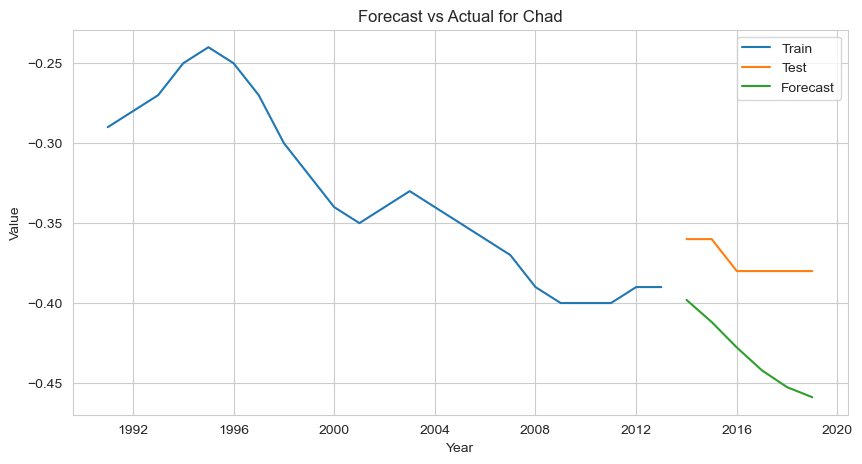

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-103.501, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-104.268, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-107.777, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-105.398, Time=0.35 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-108.117, Time=0.33 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-106.180, Time=0.31 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-106.167, Time=0.58 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-107.210, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-104.173, Time=0.43 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-106.641, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.786 seconds
Forecast for Sierra Leone:
Year
2014-01-01   -0.573061
2015-01-01   -0.531945
2016-01-01   -0.493098
2017-01-01   -0.452203
2018-01-01   -0.412671
2019-01-01   -0.372058
dtype: float64


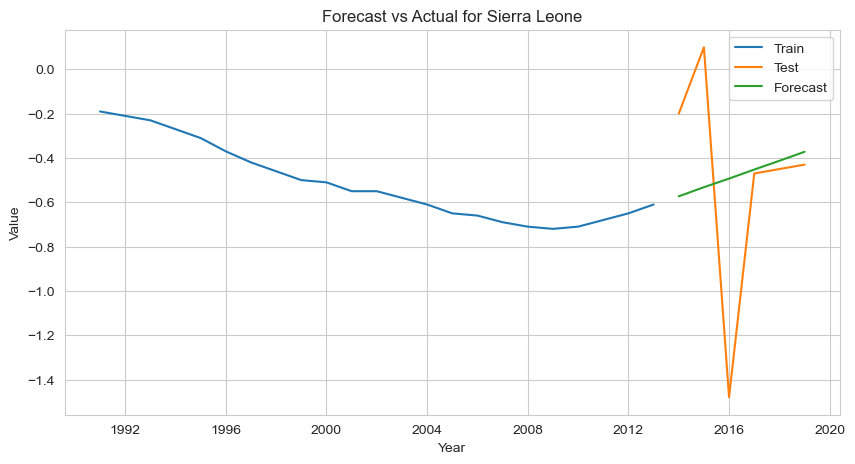

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-79.336, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-82.387, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-80.616, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-80.608, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-79.089, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80.255, Time=0.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.017 seconds
Forecast for Central African Republic:
Year
2014-01-01   -0.387727
2015-01-01   -0.405455
2016-01-01   -0.423183
2017-01-01   -0.440911
2018-01-01   -0.458638
2019-01-01   -0.476366
dtype: float64


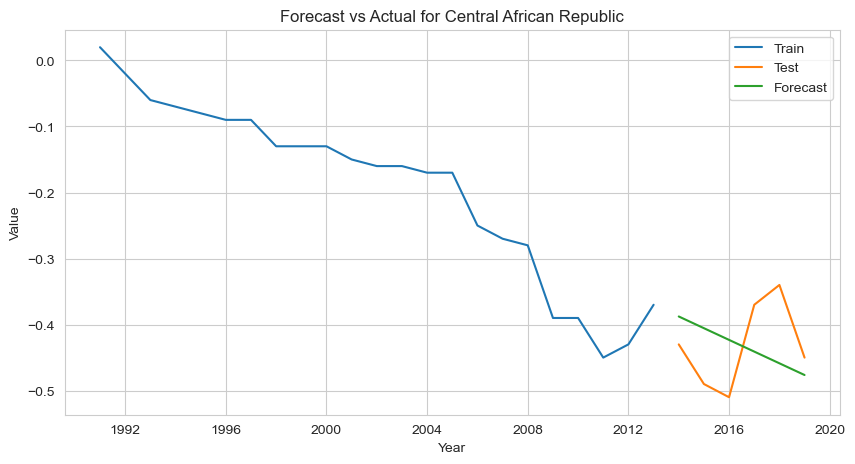

In [54]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima as pm
import matplotlib.pyplot as plt

# List of country names
countries = ['Somalia', 'Nigeria', 'Chad', 'Sierra Leone', 'Central African Republic']

# Dictionary to store time series data
ts_dict = {
    'central_african_republic': ts_central_african_republic,
    'nigeria': ts_nigeria,
    'chad': ts_chad,
    'sierra_leone': ts_sierra_leone,
    'somalia': ts_somalia
}

# Loop through each country in the list
for country in countries:
    # Get the lowercase version of the country name without spaces
    country_key = country.lower().replace(" ", "_")
    
    # Get the time series data using the lowercase key
    ts = ts_dict[country_key]

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 80% for training
    split_idx = int(len(ts) * train_size)  # Convert to integer for indexing

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the SARIMA model with automatic selection of parameters
    model = pm(train, seasonal=True, m=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model.fit(train)
    
    # Forecast on the test set
    forecast = model.predict(n_periods=len(test))

    print(f"Forecast for {country}:")
    print(pd.Series(forecast, index=test.index))  # Print forecast with correct index

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train.values, label='Train')
    plt.plot(test.index, test.values, label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f"Forecast vs Actual for {country}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5.742, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-51.322, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.173, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-73.789, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-75.153, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-84.833, Time=0.31 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-85.443, Time=0.33 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-80.523, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-85.763, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-82.962, Time=0.34 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-85.081, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-81.527, Time=0.45 s

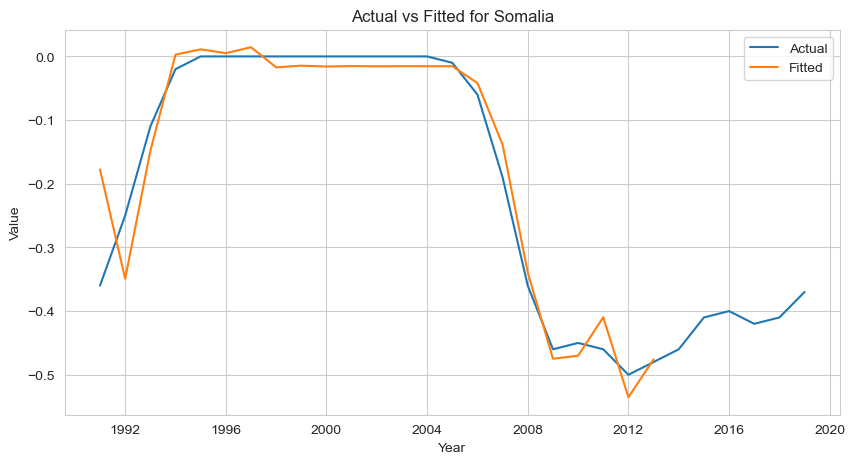

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-81.700, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11.557, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-66.243, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24.029, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-86.746, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-54.154, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-81.609, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-93.740, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-103.342, Time=0.45 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-91.714, Time=0.64 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-89.896, Time=1.26 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-93.253, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-108.480, Tim

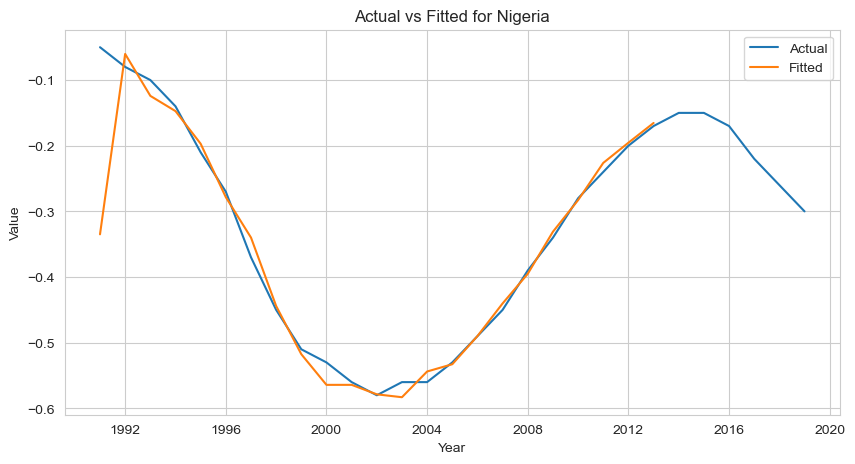

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-132.673, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-124.488, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-135.758, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-135.931, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-123.968, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-136.552, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-141.723, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-137.673, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-133.880, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-134.641, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-136.881, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-137.727, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-136.934, Time=0.21 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.301 seconds


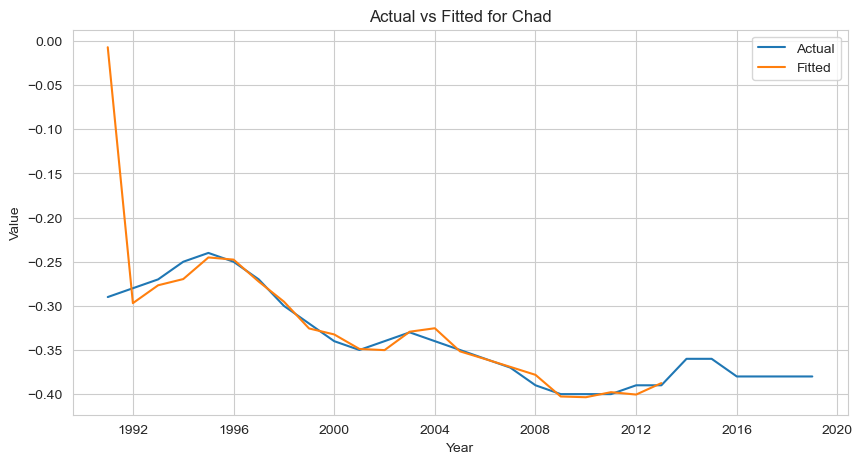

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-103.501, Time=0.71 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-104.268, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-107.777, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-105.398, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-108.117, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-106.180, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-106.167, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-107.210, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-104.173, Time=1.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-106.641, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.906 seconds


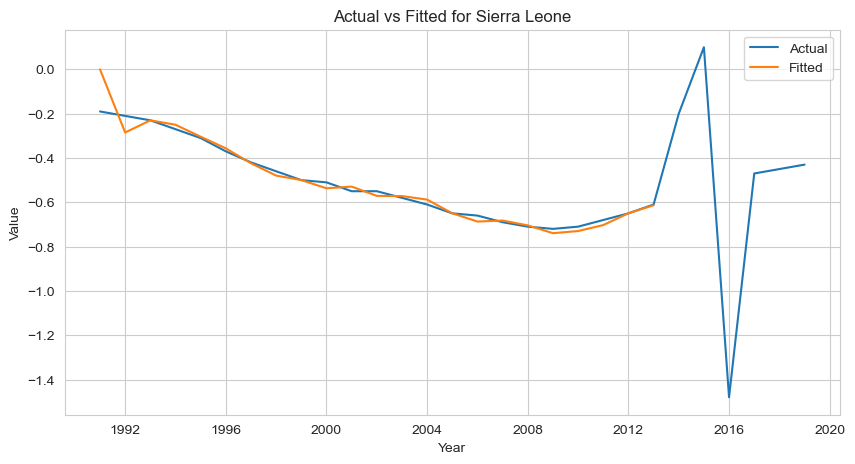

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-79.336, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-82.387, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-80.616, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-80.608, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-79.089, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80.255, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.726 seconds


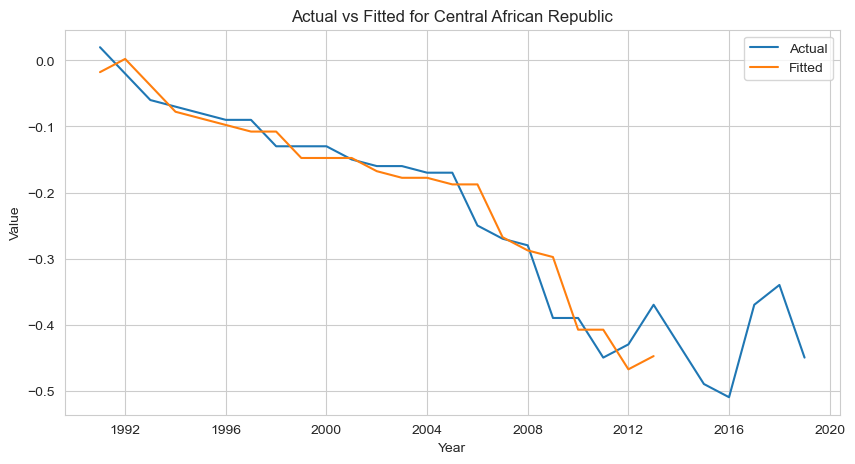

In [55]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima as pm
import matplotlib.pyplot as plt

# List of country names
countries = ['Somalia', 'Nigeria', 'Chad', 'Sierra Leone', 'Central African Republic']

# Dictionary to store time series data
ts_dict = {
    'central_african_republic': ts_central_african_republic,
    'nigeria': ts_nigeria,
    'chad': ts_chad,
    'sierra_leone': ts_sierra_leone,
    'somalia': ts_somalia
}

# Loop through each country in the list
for country in countries:
    # Get the lowercase version of the country name without spaces
    country_key = country.lower().replace(" ", "_")
    
    # Get the time series data using the lowercase key
    ts = ts_dict[country_key]

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 80% for training
    split_idx = int(len(ts) * train_size)  # Convert to integer for indexing

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the SARIMA model with automatic selection of parameters
    model = pm(train, seasonal=True, m=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model.fit(train)
    
    # Get the fitted values
    fitted_values = model.predict_in_sample()

    # Visualize actual versus fitted
    plt.figure(figsize=(10, 5))
    plt.plot(ts.index, ts.values, label='Actual')
    plt.plot(train.index, fitted_values, label='Fitted')
    plt.title(f"Actual vs Fitted for {country}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    


In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Initialize a dictionary to store MSE for each country
mse_dict = {}

# Loop through each country in the list
for country in countries:
    # Get the lowercase version of the country name without spaces
    country_key = country.lower().replace(" ", "_")
    
    # Get the time series data using the lowercase key
    ts = ts_dict[country_key]

    # Calculate the split index for training and testing
    train_size = 0.80  # Leaving approximately 80% for training
    split_idx = int(len(ts) * train_size)  # Convert to integer for indexing

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the SARIMA model with automatic selection of parameters
    model = pm(train, seasonal=True, m=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model.fit(train)
    
    # Forecast on the test set
    forecast = model.predict(n_periods=len(test))
    
    # Calculate Mean Squared Error (MSE) for the current country
    mse = mean_squared_error(test, forecast)
    
    # Store MSE in the dictionary
    mse_dict[country] = mse

# Print the MSE for each country
for country, mse in mse_dict.items():
    print(f"MSE for {country}: {mse:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5.742, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-51.322, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.173, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-73.789, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-75.153, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-84.833, Time=0.30 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-85.443, Time=0.32 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-80.523, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-85.763, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-82.962, Time=0.33 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-85.081, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-81.527, Time=0.45 s

In [57]:
import numpy as np

# Calculate MSE
mse = np.mean((test - forecast)**2)

print(f"MSE: {mse}")


MSE: 0.0060450952831990765


RMSE provides insight into the accuracy of the model's predictions, with lower values indicating higher accuracy and higher values indicating lower accuracy. Based on the RMSE values provided, the model appears to perform well for most countries, with Somalia and Sierra Leone showing slightly higher prediction errors compared to the others.

### 3 Year Forecast 

In [58]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Define the forecast period
forecast_period = 3  # 3 years

# Loop through each country in the list
for country in countries:
    # Get the lowercase version of the country name without spaces
    country_key = country.lower().replace(" ", "_")
    
    # Get the time series data using the lowercase key
    ts = ts_dict[country_key]

    # Fit the SARIMA model with automatic selection of parameters
    model = auto_arima(ts, seasonal=True, m=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    
    # Extract the best order parameters from the model
    p, d, q = model.order

    # Initialize and fit the ARIMA model using the entire series
    arima_model = ARIMA(ts, order=(p, d, q))
    arima_model_fit = arima_model.fit()

    # Perform forecast for the next 3 years
    forecast = arima_model_fit.forecast(steps=forecast_period)

    # Print forecast for the country
    print(f"Forecast for {country} for the next {forecast_period} years:")
    print(forecast)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-98.322, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-72.709, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-95.291, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-74.708, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-100.310, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-100.411, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-101.154, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-99.246, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-99.237, Time=0.34 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-97.156, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-103.098, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-102.389, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-101.192, Time=0.32 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=-10

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Define the forecast period
forecast_period = 36  # 36 months = 3 years

# Loop through each country in the list
for country in countries:
    # Get the lowercase version of the country name without spaces
    country_key = country.lower().replace(" ", "_")
    
    # Get the time series data using the lowercase key
    ts = ts_dict[country_key]

    # Fit the SARIMA model with automatic selection of parameters
    model = auto_arima(ts, seasonal=True, m=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    
    # Extract the best order parameters from the model
    p, d, q = model.order

    # Initialize and fit the ARIMA model using the entire series
    arima_model = ARIMA(ts, order=(p, d, q))
    arima_model_fit = arima_model.fit()

    # Getting a forecast for the next 36 months after the last recorded date on our dataset
    forecast = arima_model_fit.get_forecast(steps=forecast_period)

    # Confidence intervals and predicted mean
    forecast_ci = forecast.conf_int()
    forecast_mean = forecast.predicted_mean

    # Create a DataFrame to hold the forecasted values along with upper and lower bounds
    future_prediction = pd.DataFrame({
        'lower': forecast_ci.iloc[:, 0],
        'upper': forecast_ci.iloc[:, 1],
        'prediction': forecast_mean
    })

    # Print the forecast for the country
    print(f"Forecast for {country} for the next {forecast_period} months:")
    print(future_prediction.head())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-98.322, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-72.709, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-95.291, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-74.708, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-100.310, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-100.411, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-101.154, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-99.246, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-99.237, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-97.156, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-103.098, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-102.389, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-101.192, Time=0.68 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=-10

### Forecast for the next 3 years:
After fitting the best ARIMA model to the data, the output provides the forecasted values for the next 3 years (2020, 2021, and 2022) for each country. For example:

#### For Somalia:
The forecasted mortality rates for the next 3 years are approximately -0.312, -0.282, and -0.270.

#### For Nigeria: 
The forecasted mortality rates for the next 3 years are approximately -0.349, -0.397, and -0.442.

#### For Chad:
The forecasted mortality rates for the next 3 years are approximately -0.380 for all three years.

#### For Sierra Leone: 
The forecasted mortality rates for the next 3 years are approximately -0.509 for all three years.

#### For Central African Republic: 
The forecasted mortality rates for the next 3 years are approximately -0.472, -0.438, and -0.427.

## KENYA  AND RWANDA 3 YEAR FORECAST

In [60]:
# Assuming you have a DataFrame named mortality_df containing the mortality data

# Filter the data for Kenya
kenya_data = mortality_df[mortality_df['Entity'] == 'Kenya']

# Slice the Kenya data to include only the years from 2010 to 2019
ts_kenya_2010_2019 = kenya_data.loc['2010':'2019']

# Convert the filtered time series data into a DataFrame format
historical_data_kenya = pd.DataFrame(ts_kenya_2010_2019)

# Display the historical data
print("Historical Mortality Rate Data for Kenya (2010-2019):")

historical_data_kenya.head()

Historical Mortality Rate Data for Kenya (2010-2019):


Entity  Invasive Non-typhoidal Salmonella (iNTS)  \
Year                                                          
2010-01-01  Kenya                                       997   
2011-01-01  Kenya                                      1080   
2012-01-01  Kenya                                      1067   
2013-01-01  Kenya                                      1085   
2014-01-01  Kenya                                      1062   

            Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
Year                                                                            
2010-01-01                     108                      2986               47   
2011-01-01                     114                      3101               48   
2012-01-01                     115                      2991               46   
2013-01-01                     113                      2952               45   
2014-01-01                     109                      2857               43   

            Neoplasms  Measles  Digestive diseases  \
Year                                                 
2010-01-01        410     1373                 302   
2011-01-01        433     1572                 311   
2012-01-01        425     2448                 300   
2013-01-01        425     1507                 293   
2014-01-01        412     1498                 280   

            Cirrhosis and other chronic liver diseases  \
Year                                                     
2010-01-01                                          38   
2011-01-01                                          39   
2012-01-01                                          37   
2013-01-01                                          36   
2014-01-01                                          34   

            Chronic kidney disease  ...  Drowning  Malaria  Syphilis  \
Year                                ...                                
2010-01-01                      56  ...       179     2557       872   
2011-01-01                      60  ...       188     1411       880   
2012-01-01                      59  ...       184     1203       871   
2013-01-01                      58  ...       179     2060       861   
2014-01-01                      56  ...       165     2680       849   

            Mortality rate, under-5 (per 1,000 live births)  \
Year                                                          
2010-01-01                                             5.74   
2011-01-01                                             5.55   
2012-01-01                                             5.41   
2013-01-01                                             5.23   
2014-01-01                                             5.06   

            Mortality rate, under-5, female (per 1,000 live births)  \
Year                                                                  
2010-01-01                                               5.30         
2011-01-01                                               5.12         
2012-01-01                                               4.97         
2013-01-01                                               4.79         
2014-01-01                                               4.63         

            Mortality rate, under-5, male (per 1,000 live births)  \
Year                                                                
2010-01-01                                               6.17       
2011-01-01                                               5.97       
2012-01-01                                               5.82       
2013-01-01                                               5.65       
2014-01-01                                               5.48       

            Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
Year                                                                    
2010-01-01                                               6668           
2011-01-01                                               6596      

In [61]:
historical_data_kenya.rename(columns={'Mortality rate, under-5 (per 1,000 live births)': 'Mortality_rate'}, inplace=True)


historical_data_kenya.reset_index(inplace=True)

kenya_df = historical_data_kenya[['Entity', 'Year', 'Mortality_rate']]

kenya_df.set_index('Year', inplace=True)

kenya_df.head()




Entity  Mortality_rate
Year                             
2010-01-01  Kenya            5.74
2011-01-01  Kenya            5.55
2012-01-01  Kenya            5.41
2013-01-01  Kenya            5.23
2014-01-01  Kenya            5.06

In [62]:
# Select the Mortality_rate column as the endogenous variable
endog_data = kenya_df['Mortality_rate']

# Convert endog_data to a NumPy array
endog_data_array = np.asarray(endog_data)

# Fit ARIMA model with the best parameters
p = 4
d = 0
q = 1
model = ARIMA(endog_data_array, order=(p, d, q))  
arima_model_fit = model.fit()

# Forecast next 3 years
forecast = arima_model_fit.forecast(steps=3)

# Display the forecast
print("Forecasted Mortality Rate Data for Kenya (2020-2022):")
print(forecast)

Forecasted Mortality Rate Data for Kenya (2020-2022):
[4.17432583 4.05633838 3.96879622]


In [63]:
# Add the 'Entity' column to the forecasted data
forecast_data = pd.DataFrame({'Entity': 'Kenya', 'Mortality_rate': forecast}, index=pd.date_range(start='2020-01-01', periods=3, freq='Y'))

# Combine historical data with forecasted data
combined_data = pd.concat([kenya_df, forecast_data])

# Display the combined data
print("Combined Mortality Rate Data for Kenya (2010-2022):")
print(combined_data)

Combined Mortality Rate Data for Kenya (2010-2022):
           Entity  Mortality_rate
2010-01-01  Kenya        5.740000
2011-01-01  Kenya        5.550000
2012-01-01  Kenya        5.410000
2013-01-01  Kenya        5.230000
2014-01-01  Kenya        5.060000
2015-01-01  Kenya        4.890000
2016-01-01  Kenya        4.720000
2017-01-01  Kenya        4.590000
2018-01-01  Kenya        4.430000
2019-01-01  Kenya        4.300000
2020-12-31  Kenya        4.174326
2021-12-31  Kenya        4.056338
2022-12-31  Kenya        3.968796


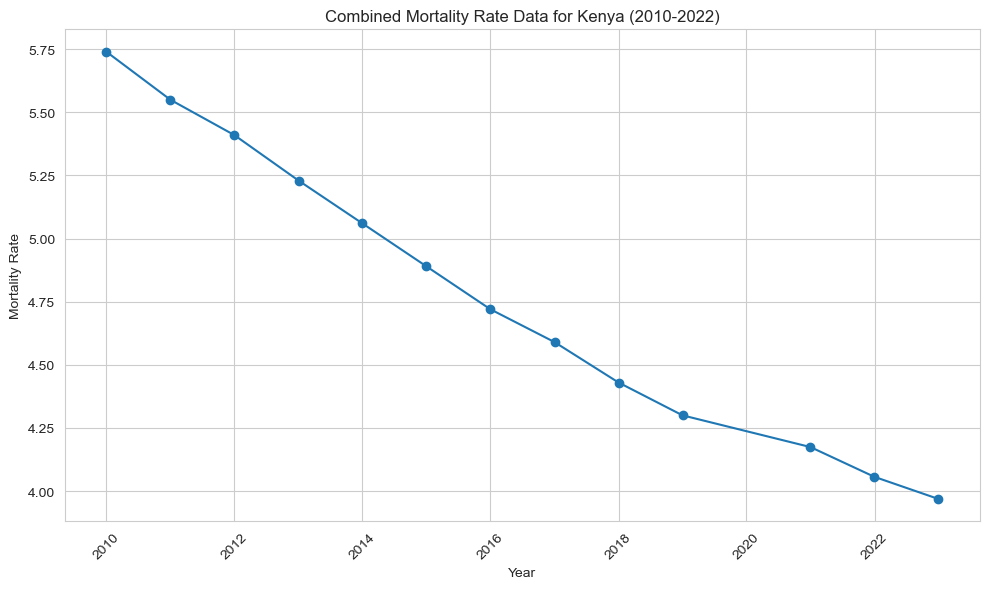

In [64]:
import matplotlib.pyplot as plt

# Plot the combined data
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Mortality_rate'], marker='o', linestyle='-')
plt.title('Combined Mortality Rate Data for Kenya (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The infant mortality rate for Kenya in 2023 was 30.629 deaths per 1000 live births, a 3.59% decline from 2022. The infant mortality rate for Kenya in 2022 was 31.771 deaths per 1000 live births, a 3.47% decline from 2021

In [65]:
# Get the mortality rates for 2021 and 2022
mortality_2021 = combined_data.loc['2021-12-31', 'Mortality_rate']
mortality_2022 = combined_data.loc['2022-12-31', 'Mortality_rate']

# Calculate the rate of decline
rate_of_decline = ((mortality_2021 - mortality_2022) / mortality_2021) * 100

# Display the rate of decline
print("Rate of decline in mortality rate between 2021 and 2022: {:.2f}%".format(rate_of_decline))


Rate of decline in mortality rate between 2021 and 2022: 2.16%


#### RWANDA

In [66]:
# Assuming you have a DataFrame named mortality_df containing the mortality data

# Filter the data for Kenya
rwanda_data = mortality_df[mortality_df['Entity'] == 'Rwanda']

# Slice the Kenya data to include only the years from 2010 to 2019
ts_rwanda_2010_2019 = rwanda_data.loc['2010':'2019']

# Convert the filtered time series data into a DataFrame format
historical_data_rwanda = pd.DataFrame(ts_rwanda_2010_2019)

# Display the historical data
print("Historical Mortality Rate Data for Rwanda (2010-2019):")

historical_data_rwanda.head()

Historical Mortality Rate Data for Rwanda (2010-2019):


Entity  Invasive Non-typhoidal Salmonella (iNTS)  \
Year                                                           
2010-01-01  Rwanda                                        24   
2011-01-01  Rwanda                                        24   
2012-01-01  Rwanda                                        23   
2013-01-01  Rwanda                                        21   
2014-01-01  Rwanda                                        22   

            Interpersonal violence  Nutritional deficiencies  Acute hepatitis  \
Year                                                                            
2010-01-01                      44                      1193               17   
2011-01-01                      43                      1087               16   
2012-01-01                      43                      1011               16   
2013-01-01                      40                       821               13   
2014-01-01                      43                       853               14   

            Neoplasms  Measles  Digestive diseases  \
Year                                                 
2010-01-01        295      720                 189   
2011-01-01        288      735                 183   
2012-01-01        284     1097                 180   
2013-01-01        255     1150                 162   
2014-01-01        276      227                 173   

            Cirrhosis and other chronic liver diseases  \
Year                                                     
2010-01-01                                          35   
2011-01-01                                          34   
2012-01-01                                          34   
2013-01-01                                          30   
2014-01-01                                          34   

            Chronic kidney disease  ...  Drowning  Malaria  Syphilis  \
Year                                ...                                
2010-01-01                      41  ...       138     3034       327   
2011-01-01                      40  ...       129     2820       332   
2012-01-01                      39  ...       119     2330       342   
2013-01-01                      33  ...       101     1765       341   
2014-01-01                      36  ...       109     1814       351   

            Mortality rate, under-5 (per 1,000 live births)  \
Year                                                          
2010-01-01                                             6.38   
2011-01-01                                             5.86   
2012-01-01                                             5.49   
2013-01-01                                             5.20   
2014-01-01                                             4.97   

            Mortality rate, under-5, female (per 1,000 live births)  \
Year                                                                  
2010-01-01                                               5.93         
2011-01-01                                               5.43         
2012-01-01                                               5.08         
2013-01-01                                               4.79         
2014-01-01                                               4.58         

            Mortality rate, under-5, male (per 1,000 live births)  \
Year                                                                
2010-01-01                                               6.81       
2011-01-01                                               6.27       
2012-01-01                                               5.89       
2013-01-01                                               5.59       
2014-01-01                                               5.35       

            Deaths - All causes - Sex: Both - Age: 7-27 days (Number)  \
Year                                                                    
2010-01-01                                               2257           
2011-01-01                                               2204

In [67]:
historical_data_rwanda.rename(columns={'Mortality rate, under-5 (per 1,000 live births)': 'Mortality_rate'}, inplace=True)


historical_data_rwanda.reset_index(inplace=True)

rwanda_df = historical_data_rwanda[['Entity', 'Year', 'Mortality_rate']]

rwanda_df.set_index('Year', inplace=True)

rwanda_df.head()

Entity  Mortality_rate
Year                              
2010-01-01  Rwanda            6.38
2011-01-01  Rwanda            5.86
2012-01-01  Rwanda            5.49
2013-01-01  Rwanda            5.20
2014-01-01  Rwanda            4.97

In [68]:
# Select the Mortality_rate column as the endogenous variable
endog_data = rwanda_df['Mortality_rate']

# Convert endog_data to a NumPy array
endog_data_array = np.asarray(endog_data)

# Fit ARIMA model with the best parameters
p = 4
d = 0
q = 1
model = ARIMA(endog_data_array, order=(p, d, q))  
arima_model_fit = model.fit()

# Forecast next 3 years
forecast = arima_model_fit.forecast(steps=3)

# Display the forecast
print("Forecasted Mortality Rate Data for Rwanda (2020-2022):")
print(forecast)

Forecasted Mortality Rate Data for Rwanda (2020-2022):
[4.0323219  3.88178539 3.7527916 ]


In [69]:
# Add the 'Entity' column to the forecasted data
forecast_data = pd.DataFrame({'Entity': 'Rwanda', 'Mortality_rate': forecast}, index=pd.date_range(start='2020-01-01', periods=3, freq='Y'))

# Combine historical data with forecasted data
combined_data_rwanda = pd.concat([rwanda_df, forecast_data])

# Display the combined data
print("Combined Mortality Rate Data for rwanda (2010-2022):")
print(combined_data_rwanda)

Combined Mortality Rate Data for rwanda (2010-2022):
            Entity  Mortality_rate
2010-01-01  Rwanda        6.380000
2011-01-01  Rwanda        5.860000
2012-01-01  Rwanda        5.490000
2013-01-01  Rwanda        5.200000
2014-01-01  Rwanda        4.970000
2015-01-01  Rwanda        4.770000
2016-01-01  Rwanda        4.600000
2017-01-01  Rwanda        4.460000
2018-01-01  Rwanda        4.340000
2019-01-01  Rwanda        4.190000
2020-12-31  Rwanda        4.032322
2021-12-31  Rwanda        3.881785
2022-12-31  Rwanda        3.752792


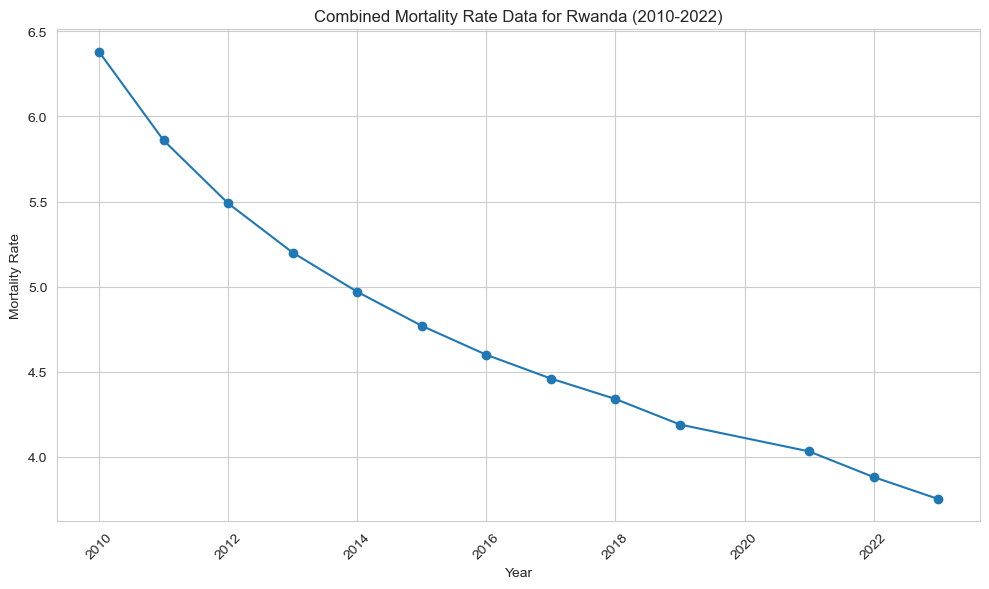

In [70]:
import matplotlib.pyplot as plt

# Plot the combined data
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data_rwanda['Mortality_rate'], marker='o', linestyle='-')
plt.title('Combined Mortality Rate Data for Rwanda (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Get the mortality rates for 2021 and 2022
mortality_2021 = combined_data_rwanda.loc['2021-12-31', 'Mortality_rate']
mortality_2022 = combined_data_rwanda.loc['2022-12-31', 'Mortality_rate']

# Calculate the rate of decline
rate_of_decline = ((mortality_2021 - mortality_2022) / mortality_2021) * 100

# Display the rate of decline
print("Rate of decline in mortality rate between 2021 and 2022: {:.2f}%".format(rate_of_decline))



Rate of decline in mortality rate between 2021 and 2022: 3.32%


### FINDINGS

The model forecasts a decline in under-5 mortality rates over a 3-year period for both Kenya and Rwanda. Interestingly, Rwanda exhibited a more pronounced decrease in under-5 mortality rates compared to Kenya. This observation aligns with findings from a study published in the [Public Health Journal](https://openpublichealthjournal.com/contents/volumes/V17/e18749445270922/e18749445270922.pdf), which confirms that Rwanda has made significant strides in reducing mortality rates for children under the age of five when compared to Kenya, Tanzania, and Uganda. Specifically, pairwise Wilcoxon signed rank comparisons revealed Rwanda's notable improvements in lowering under-5 mortality rates in comparison to the other mentioned countries.

## RECOMMENDATIONS

Based on the success of Rwanda in reducing under-5 mortality rates and the factors contributing to this achievement, here are recommendations for healthcare providers and policymakers in other countries, including Kenya:

#### 1.Governmental Commitment and Leadership:
Healthcare providers and policymakers should prioritize children's health and well-being at the forefront of their agendas. Strong governmental commitment and leadership are crucial in driving initiatives to improve child health outcomes.

#### 2.Community-Based Health Initiatives: 
Implement community-based health initiatives with a focus on mother and child health components. Engage local communities in promoting healthy practices and providing access to essential healthcare services.

#### 3.Health Insurance Coverage: 
Establish or improve health insurance programs to ensure comprehensive health coverage for all citizens, especially vulnerable populations such as children and mothers. Programs like Rwanda's Mutuelle de Santé can serve as models for expanding health insurance coverage.

#### 4.Investments in Healthcare Infrastructure: 
Allocate resources towards building and remodeling healthcare infrastructure, including hospitals, clinics, and primary healthcare centers. Investing in modern medical facilities can improve access to quality healthcare services for children and families.

#### 5.Emphasis on Preventative Healthcare:
Shift focus towards preventative healthcare initiatives, including immunization drives, nutrition programs, and family planning services. Prioritize early intervention and preventive measures to reduce the burden of preventable diseases and improve child health outcomes.

#### Partnerships and Collaborations:
Foster partnerships with international organizations, non-governmental organizations (NGOs), and other stakeholders to leverage expertise, resources, and best practices. Collaborative efforts can strengthen healthcare systems and enhance the delivery of child health services.

By adopting these recommendations and learning from Rwanda's success, healthcare providers and policymakers can work towards improving child health outcomes and reducing under-5 mortality rates in their respective countries.